# 0.0. IMPORTS

In [1]:
import pandas as pd
import numpy as np
import inflection
import math
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
from matplotlib import gridspec
from IPython.core.display import HTML
from IPython.display import Image 

## 0.1. Helper Functions

Seção para construção de funções auxiliares para o projeto

In [2]:
def jupyter_settings():
    %matplotlib inline
    #%pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [20, 10]
    plt.rcParams['font.size'] = 10
    display( HTML( '<style>.container { width:97% !important; }</style>') )
    pd.options.display.max_columns = 50
    pd.options.display.max_rows = 50
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()
    pd.set_option('display.float_format', lambda x: '%.2f' % x)
    
    return None

In [3]:
jupyter_settings()

## 0.2. Loading Data

Carregamento dos dados - Extração

In [4]:
df_sales_raw = pd.read_csv('data/train.csv', low_memory = False)
df_store_raw = pd.read_csv('data/store.csv', low_memory = False)

# merge 
df_raw = pd.merge(df_sales_raw, df_store_raw, how = 'left', on = 'Store' )

In [4]:
df_sales_raw.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
df_store_raw.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [6]:
df_raw.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


# 1.0. DESCRIÇÃO DOS DADOS

In [5]:
### Cópia do dataframe em início de sessão 
### OBJETIVO: Caso seja realizado alguma instrução errada sob os dados trabalhados, poder ter um ponto de backup.

df1 = df_raw.copy()

In [ ]:
## FARIA AQUI: Significado das colunas 

## 1.1. Rename Columns

Ter o nome das colunas de maneira mais intuitiva para trabalhar com ciência de dados

In [6]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
           'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
           'CompetitionDistance', 'CompetitionOpenSinceMonth',
           'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
           'Promo2SinceYear', 'PromoInterval']

## Utiliza função lambda para encapsular a função que transforma para snake_case os atributos
snakecase = lambda x: inflection.underscore( x )

## Map - Mapeia cada valor dentro da estrutura de dado passada e aplica a função snakecase
cols_new = list( map( snakecase, cols_old ) )

## rename 
df1.columns = cols_new

In [7]:
df1.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval'],
      dtype='object')

## 1.2. Data Dimensions

In [9]:
print(f'Number of Rows: {df1.shape[0]}')
print(f'Number of Cols: {df1.shape[1]}')

#print( 'Number of Rows: {}'.format( df1.shape[0] ) )
#print( 'Number of Cols: {}'.format( df1.shape[1] ) )

Number of Rows: 1017209
Number of Cols: 18


## 1.3. Data Types

In [7]:
## Arrumar para a coluna date ficar com o tipo de dado correto
df1['date'] = pd.to_datetime( df1['date'] )


In [10]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 1.4. Check NA

In [15]:
# MÉTODO .isna() vai varrer o dataset indicando para cada valor de linha e coluna se possui valor ou está NA e indicar com 
# True ou False 
# .sum() para somar os valores True nas colunas e dar dimensão de dados faltantes por coluna

df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## 1.5. Fillout NA

In [8]:
#competition_distance    

# Assumptions: o valor NA ocorre quando a loja em questão não possui competidor próximo ou esse é tão longe que não é 
# considerado competidor próximo

# Action: substituir os NA´s por um valor maior que o valor máximo existente para outras lojas

df1['competition_distance'] = df1['competition_distance'].apply( lambda x: 200000.0 if math.isnan( x ) else x)

In [9]:
#competition_open_since_month   

# Assumptions: se a loja não possui competidor próximo, até faz sentido essa coluna ser 0 ou NA, porque não existe data de 
# abertura se não existe loja, mas a questão é que existe mais faltante nessa coluna que na coluna de distância de competidor
# próximo. 

# Action: substituir os NA´s pelo valor do mês da data de venda do histórico de vendas da loja. (sem muita lógica)

df1['competition_open_since_month'] = df1.apply(lambda x: x['date'].month if math.isnan( x['competition_open_since_month'] ) 
                                                else x['competition_open_since_month'], axis = 1)

In [10]:
#competition_open_since_year     

# Assumptions: se a loja não possui competidor próximo, até faz sentido essa coluna ser 0 ou NA, porque não existe data de 
# abertura se não existe loja, mas a questão é que existe mais faltante nessa coluna que na coluna de distância de competidor
# próximo. 

# Action: substituir os NA´s pelo valor do ano da data de venda do histórico de vendas da loja. (sem muita lógica)


df1['competition_open_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan( x['competition_open_since_year'] ) 
                                                else x['competition_open_since_year'], axis = 1)

In [11]:
#promo2_since_week               

# Assumptions: os NA´s ocorrem em lojas que não participam da promo2, pois não existe semana de início da promo2 se a loja
# decidiu não participar. 

# Action: substituir os NA´s pelo valor da semana da data de venda do histórico de vendas da loja. (sem muita lógica)

df1['promo2_since_week'] = df1.apply(lambda x: x['date'].week if math.isnan( x['promo2_since_week'] ) 
                                                else x['promo2_since_week'], axis = 1)

In [12]:
#promo2_since_year               

# Assumptions: os NA´s ocorrem em lojas que não participam da promo2, pois não existe ano de início da promo2 se a loja
# decidiu não participar. 

# Action: substituir os NA´s pelo valor do ano da data de venda do histórico de vendas da loja. (sem muita lógica)

df1['promo2_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan( x['promo2_since_year'] ) 
                                                else x['promo2_since_year'], axis = 1)

In [13]:
#promo_interval

# Assumptions: épocas de promoção 2 são conjuntos de meses que caracterizam o início de promoções 2. O NA nessa coluna 
# caracteriza que a loja referida não realizou promoções em nenhum mês do ano da referente data. 

# Action: substituir os NA´s por 0 pois significa que não tem época de promoção naquele ano. 
# Criar coluna extra ('is_promo') para indicar se mês de venda da loja vigente é o mês de promo2 consecutiva. 

month_map = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}

df1['promo_interval'].fillna(0, inplace = True)

#month_map é a abreviação do mês de mensuração de venda
df1['month_map'] = df1['date'].dt.month.map( month_map )

# atributo que diz se o mês de venda é o mês em que se realiza promoção periodicamente
df1['is_promo'] = df1[['month_map','promo_interval']].apply(lambda x: 0 if x['promo_interval'] == 0 else 1 if 
                                                            x['month_map'] in x['promo_interval'].split( ',' ) else 0, axis = 1)

## 1.6. Change Types

Após seção de manipulação, criação de colunas é interessante novamente organizar os tipos de dados

In [38]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [14]:
### Mudar nº de mês, ano e semana de float64 para int64

df1['competition_open_since_month'] = df1['competition_open_since_month'].astype( 'int64' )
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype( 'int64' )

df1['promo2_since_week'] = df1['promo2_since_week'].astype( 'int64' )
df1['promo2_since_year'] = df1['promo2_since_year'].astype( 'int64' )

## 1.7. Descriptive Statistical

In [37]:
## FARIA AQUI: Separação em atributos relacionados a datas
## Separar atributos/colunas em numéricas e categóricas

num_attributes = df1.select_dtypes( include = ['int64','float64'] )
cat_attributes = df1.select_dtypes( exclude = ['int64','float64','datetime64[ns]'] )

### 1.7.1. Numerical Attributes

In [16]:
# Option 1

# Central Tendency - mean, median

ct1 = pd.DataFrame( num_attributes.apply( np.mean ) )
ct2 = pd.DataFrame( num_attributes.apply( np.median ) )

# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) )
d2 = pd.DataFrame( num_attributes.apply( min ) )
d3 = pd.DataFrame( num_attributes.apply( max ) )
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) )
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) )
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) )

m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6], axis = 1 ).reset_index()

m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std','skew', 'kurtosis']

# Option 2

## Min, Max, Range, Mean, Median, Std, Skew, Kurtosis
num_attributes.agg(['min', 'max', 'ptp', 'mean', 'median', 'std', 'skew', 'kurtosis']).T.reset_index().rename(columns={'index': 'attributes', 'ptp': 'range'})

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908651,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997391,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.926175,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411734,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485759,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.652996,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311087,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515593,-7.235657,124.071304


C:\Users\alanc\AppData\Local\Temp\ipykernel_12928\710812770.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['sales'])


<AxesSubplot:xlabel='sales', ylabel='Density'>

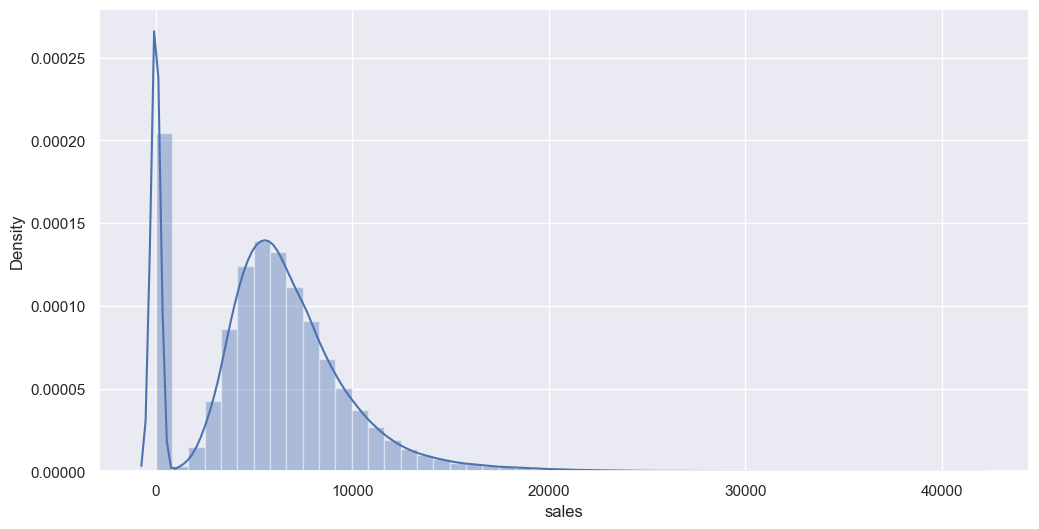

In [33]:
sns.distplot(df1['sales'])

C:\Users\alanc\AppData\Local\Temp\ipykernel_12928\3380288980.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['competition_distance'])


<AxesSubplot:xlabel='competition_distance', ylabel='Density'>

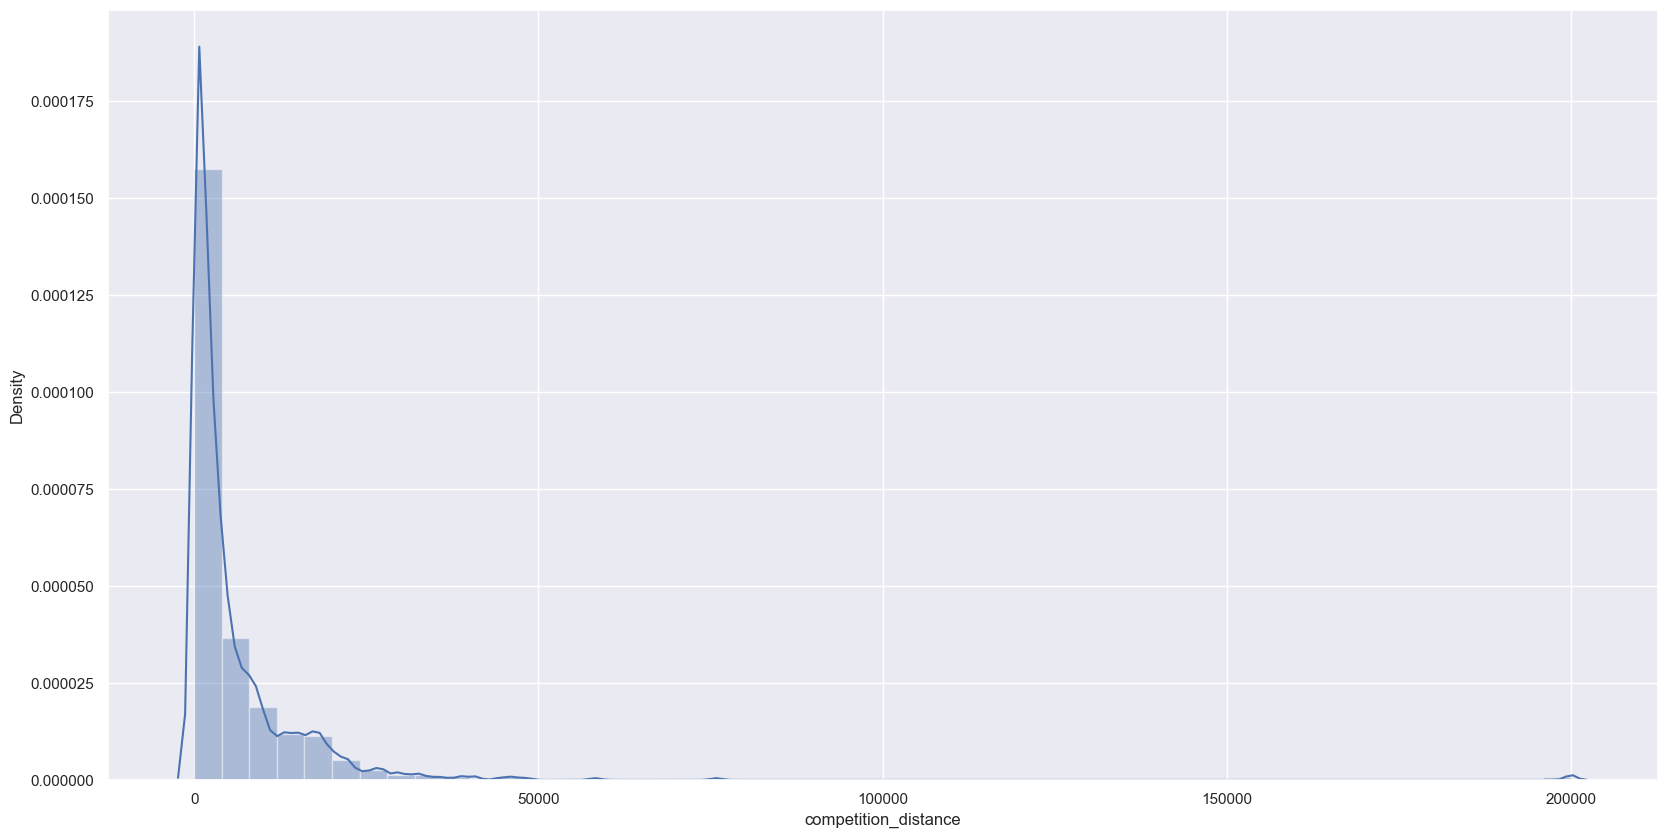

In [44]:
sns.distplot(df1['competition_distance'])

### 1.7.2. Categorical Attributes

In [21]:
# Valores únicos de cada uma das categorias 

cat_attributes.apply( lambda x: x.nunique() )

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

<AxesSubplot:xlabel='assortment', ylabel='sales'>

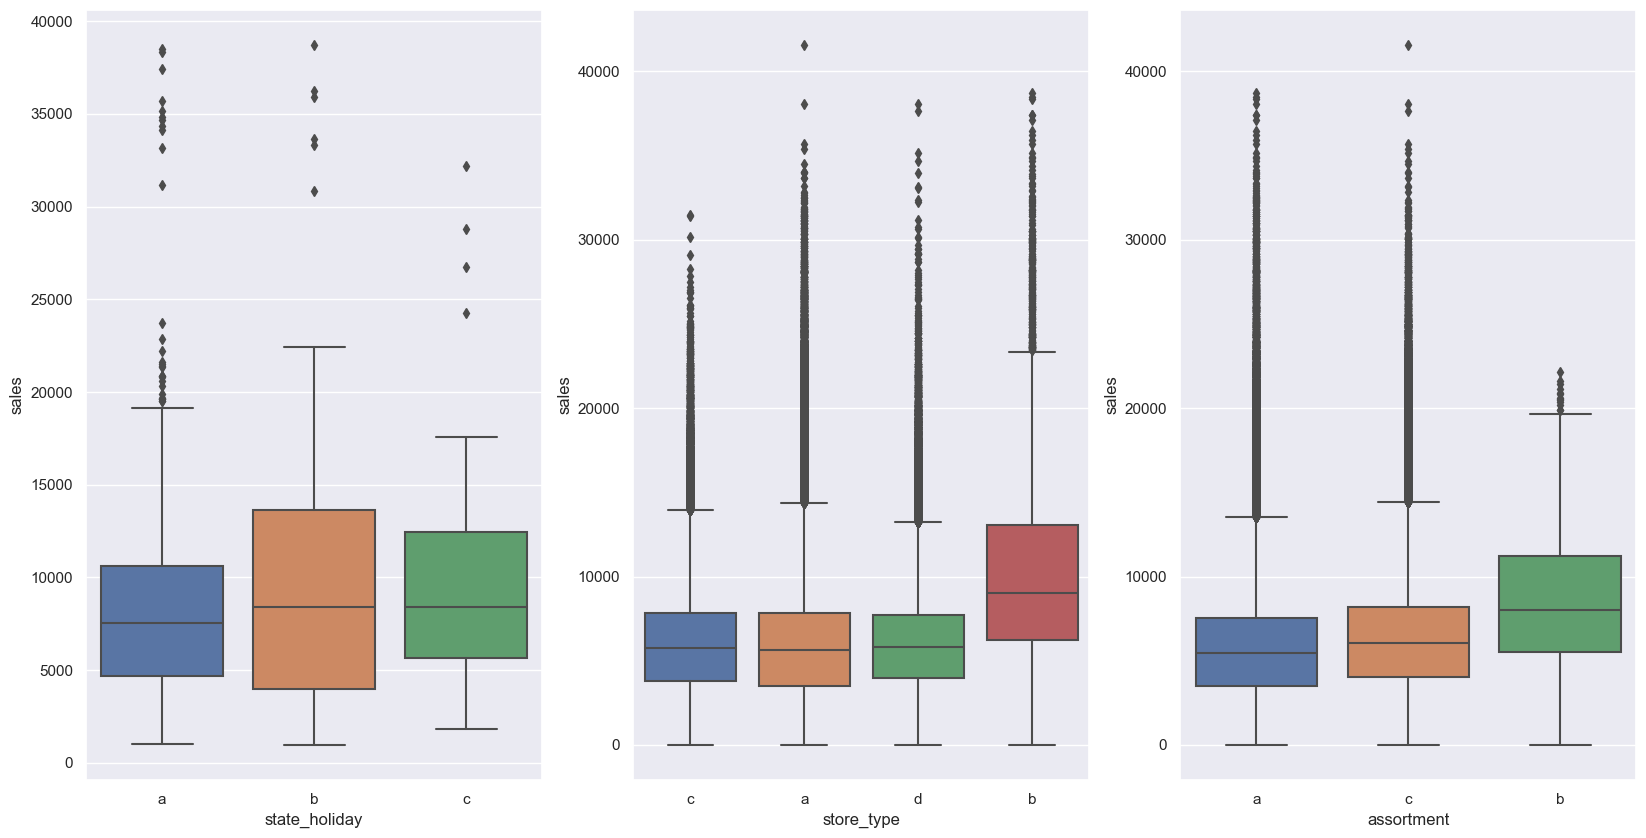

In [42]:
# Filtrar para enxergar melhor situação de loja aberta (vendas > 0) em feriados ('state_holiday' != '0') 
aux1 = df1[ (df1['state_holiday'] != '0') & (df1['sales'] > 0)]

# Performance Vendas nos Feriados
plt.subplot( 1, 3, 1)
sns.boxplot(x = 'state_holiday', y = 'sales', data = aux1 )

# Performance Vendas por tipo de loja
plt.subplot( 1, 3, 2)
sns.boxplot(x = 'store_type', y = 'sales', data = df1 )

# Performance Vendas por sortimento de produtos
plt.subplot( 1, 3, 3)
sns.boxplot(x = 'assortment', y = 'sales', data = df1 )

<AxesSubplot:xlabel='month_map', ylabel='sales'>

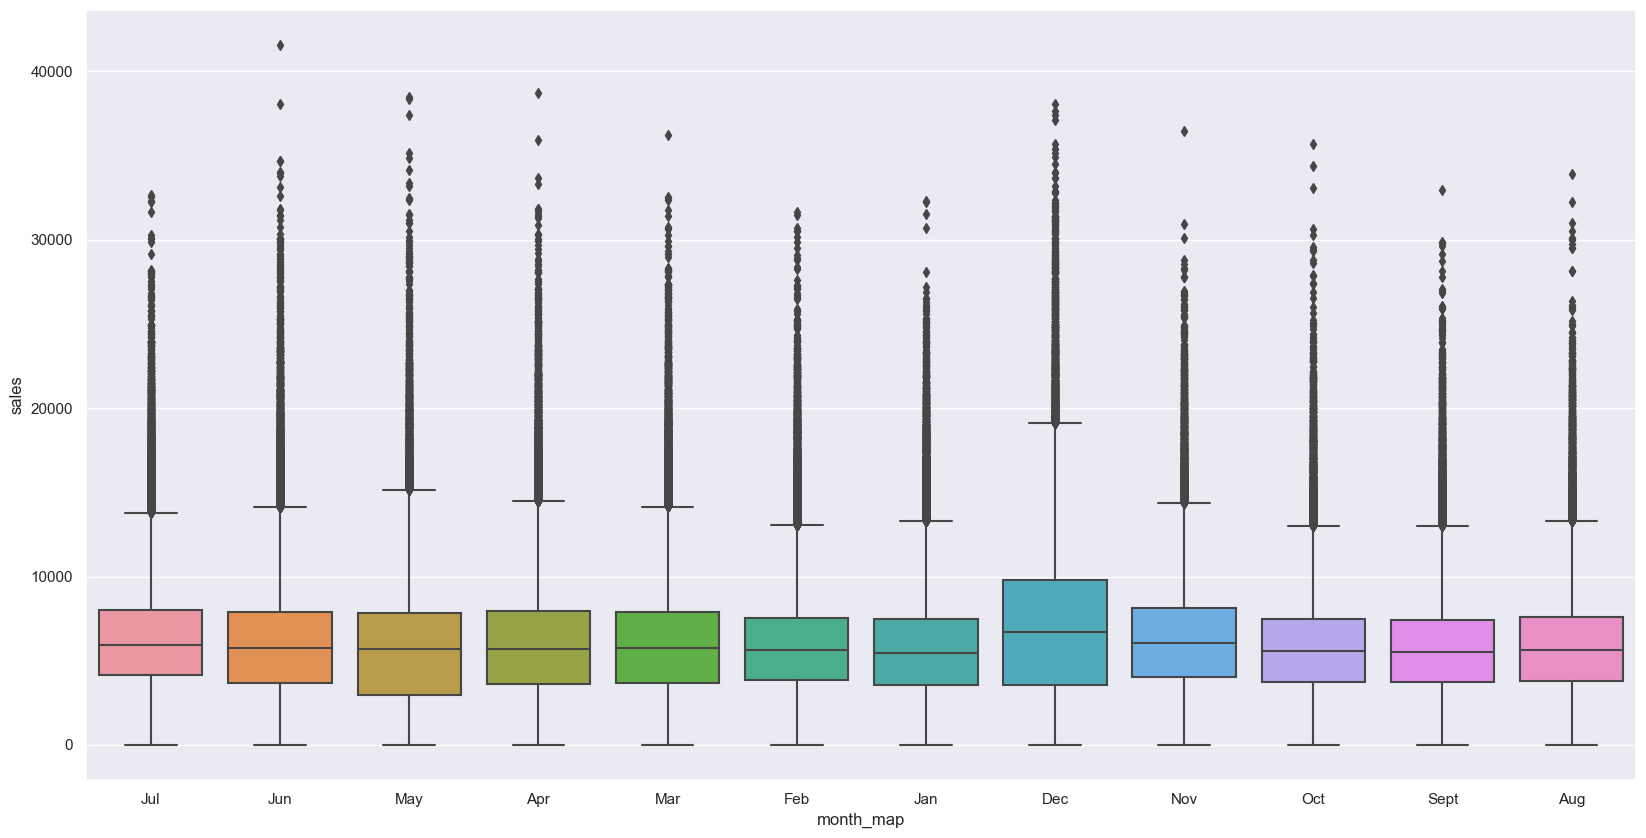

In [43]:
# Quantidade de vendas por mês

sns.boxplot(x = 'month_map', y = 'sales', data = df1 )

# 2.0. FEATURE ENGINEERING

In [16]:
### Cópia do dataframe em início de sessão 
### OBJETIVO: Caso seja realizado alguma instrução errada sob os dados trabalhados, poder ter um ponto de backup.

df2 = df1.copy()

## 2.1. Mapa Mental de Hipóteses

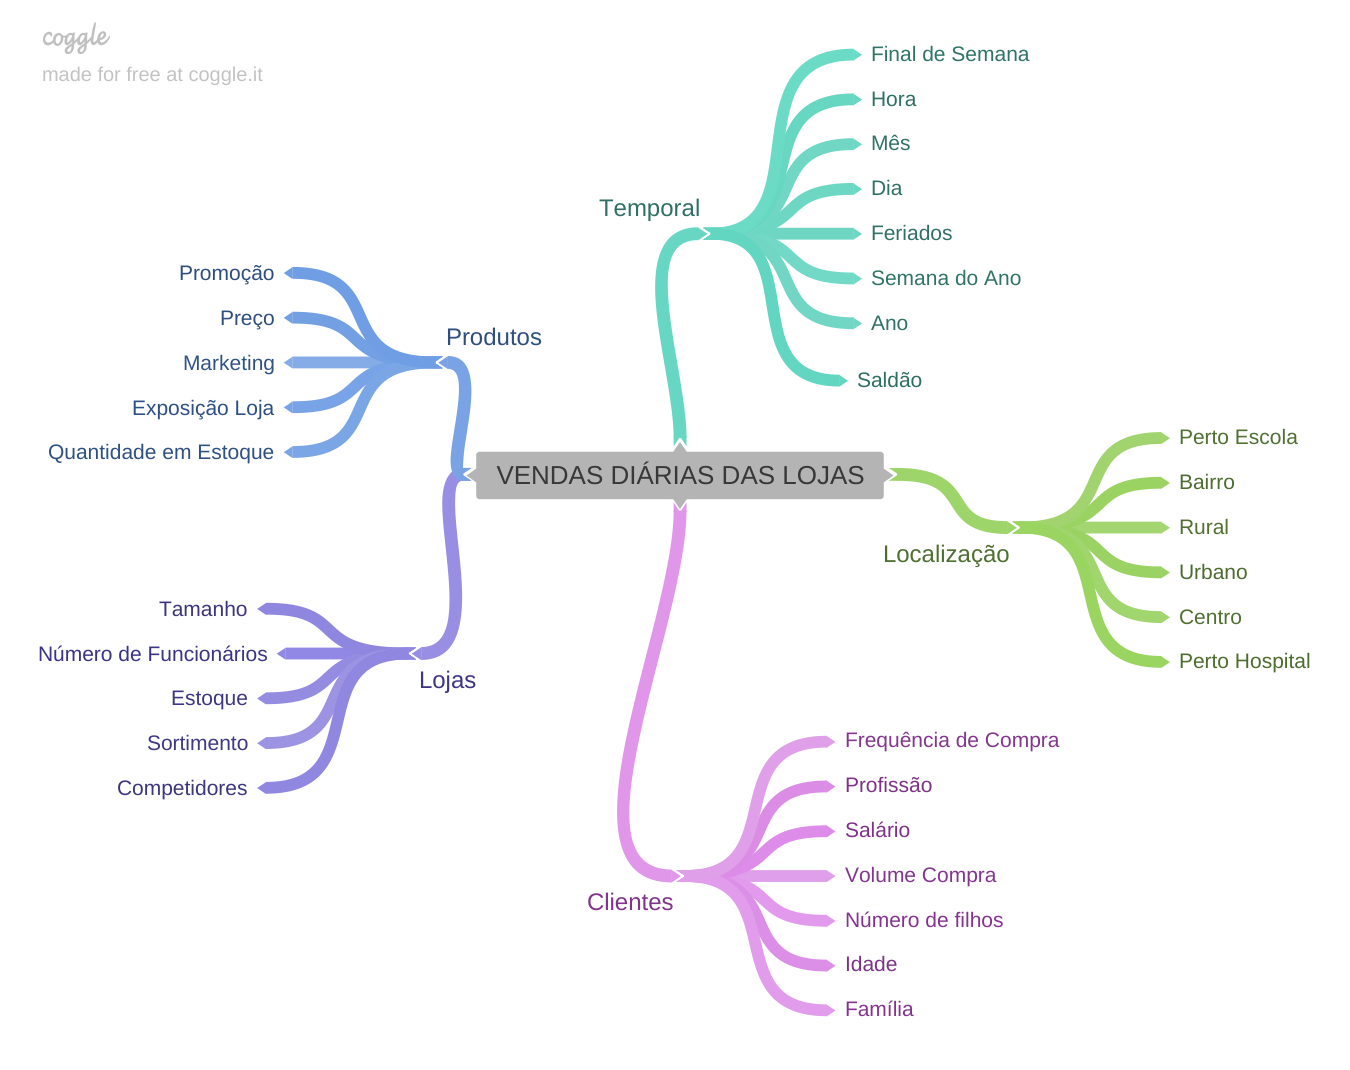

In [4]:
Image('img/VENDAS_DIARIAS_DAS_LOJAS.png')

## 2.2. Criação de Hipóteses

### 2.2.1. Hipóteses Loja

**1.** Lojas com número maior de funcionários deveriam vender mais.

**2.** Lojas com maior capacidade de estoque deveriam vender mais.

**3.** Lojas com maior porte deveriam vender mais.

**4.** Lojas com maior sortimentos deveriam vender mais.

**5.** Lojas com competidores mais próximos deveriam vender menos.

**6.** Lojas com competidores à mais tempo deveriam vender mais

### 2.2.2. Hipóteses Produto

**1.** Lojas que investem mais em Marketing deveriam vender mais.

**2.** Lojas com maior exposição de produto deveriam vender mais.

**3.** Lojas com produtos com preço menor deveriam vender mais.

**4.** Lojas com promoções mais agressivas ( descontos maiores ), deveriam vender mais.

**5.** Lojas com promoções ativas por mais tempo deveriam vender mais.

**6.** Lojas com mais dias de promoção deveriam vender mais.

**7.** Lojas com mais promoções consecutivas deveriam vender mais.

### 2.2.3. Hipóteses Temporal

**1.** Lojas abertas durante o feriado de Natal deveriam vender mais.


**2.** Lojas deveriam vender mais ao longo dos anos.


**3.** Lojas deveriam vender mais no segundo semestre do ano.


**4.** Lojas deveriam vender mais depois do dia 10 de cada mês.


**5.** Lojas deveriam vender menos aos finais de semana.


**6.** Lojas deveriam vender menos durante os feriados escolares.

## 2.3. Lista Final de Hipóteses

**1.** Lojas com maior sortimentos deveriam vender mais.


**2.** Lojas com competidores mais próximos deveriam vender menos.


**3.** Lojas com competidores à mais tempo deveriam vendem mais.


**4.** Lojas com promoções ativas por mais tempo deveriam vender mais.


**5.** Lojas com mais dias de promoção deveriam vender mais.


**6.** Lojas com mais promoções consecutivas deveriam vender mais.


**7.** Lojas abertas durante o feriado de Natal deveriam vender mais.


**8.** Lojas deveriam vender mais ao longo dos anos.


**9.** Lojas deveriam vender mais no segundo semestre do ano.


**10.** Lojas deveriam vender mais depois do dia 10 de cada mês.


**11.** Lojas deveriam vender menos aos finais de semana.


**12.** Lojas deveriam vender menos durante os feriados escolares.

## 2.4. Feature Engineering

Criação de features ou ajuste de valores features já existentes

### 2.4.1. Da variável 'date'

In [17]:
# year - extrair apenas o ano de vendas daquela loja

df2['year'] = df2['date'].dt.year

# month - extrair apenas o mês de vendas daquela loja

df2['month'] = df2['date'].dt.month

# day - extrair apenas o dia de vendas daquela loja

df2['day'] = df2['date'].dt.day

# week of year - extrair apenas a semana de vendas do ano daquela loja

df2['week_of_year'] = df2['date'].dt.isocalendar().week

# (year-week) - Formatar a data para em string aparecer o ano e a semana do ano das vendas daquela loja

df2['year_week'] = df2['date'].dt.strftime("%Y-%W")



### 2.4.2. Das variáveis 'competition_open_since_month' e 'competition_open_since_year'

In [18]:
# competition since  

# Actions: - Juntar em um coluna só e que seja do tipo datetime a data de abertura do competidor mais próximo, como não tenho exatamente o dia, usar 1 para todos


df2['competition_since'] = df2[['competition_open_since_year','competition_open_since_month']].apply(lambda x: datetime.datetime(year = x['competition_open_since_year'] , month = x['competition_open_since_month'] , day = 1 ), axis = 1)

In [19]:
# competition time month - Calculo de período entre datas

# Actions: - Criar uma nova coluna com o período (em dias) que existe competidor a partir da data de registro de venda e da abertura do competidor (date - competition since)
##         - Deve div\ 30 pois a base de comparação entre as datas possui apenas ano e mês exato(competition_since), assim, considera-se apenas a subtração de mês e ano nas datas.


df2['competition_time_month'] =( (df2['date'] - df2['competition_since']) / 30 ).apply( lambda x: x.days ).astype( 'int64' )

### 2.4.3. Das variáveis ''promo2_since_week'' e 'promo2_since_year'

In [20]:
# promo since 

# Actions: - Juntar em um coluna só a data de início da promo2, como não tenho exatamente o dia, mês e ano. Juntar ano e semana do ano como string format.
#          - Passar para datetime a coluna criada

df2['promo_since'] =  df2['promo2_since_year'].astype( str ) + "-" + df2['promo2_since_week'].astype( str )

# datetime
df2['promo_since'] = df2['promo_since'].apply( lambda x: datetime.datetime.strptime( x + '-1', '%Y-%W-%w') - datetime.timedelta(days = 7) )


In [21]:
# promo time week - - Calculo de período entre datas

# Actions: - Criar uma nova coluna com o período (em dias) que existe promoção 2 a partir da data de registro de venda e data da semana que começou a promoção (date - promo since)
##         - Deve div\ 7 pois a base de comparação entre as datas possui apenas ano e semana exato(promo_since), assim, considera-se apenas a subtração de semana e ano nas datas.

df2['promo_time_week'] =( (df2['date'] - df2['promo_since']) / 7 ).apply(lambda x: x.days ).astype( 'int64' )

### 2.4.4. Da variável 'assortment'

In [22]:
# assortment

# Actions: colocar o que significa cada sortimento de loja a, b e c. Basicamente é mudar o valor da coluna de algo categórico para sua explicação.

df2['assortment'] = df2['assortment'].apply(lambda x: 'basic' if x == 'a' else 'extra' if x == 'b' else 'extended')

### 2.4.5. Da variável 'state_holiday'

In [23]:
# state holiday

# Actions: colocar o que significa cada feriado estadual a, b e c. Basicamente é mudar o valor da coluna de algo categórico para sua explicação.


df2['state_holiday'] = df2['state_holiday'].apply(lambda x: 'public_holiday' if x == 'a' else 'easter_holiday' if x == 'b' else 'christmas' if x == 'c' else 'regular_day')

# 3.0. FILTRAGEM DE VARIÁVEIS

In [24]:
### Cópia do dataframe em início de sessão 
### OBJETIVO: Caso seja realizado alguma instrução errada sob os dados trabalhados, poder ter um ponto de backup.

df3 = df2.copy()

## 3.1. Filtragem das Linhas

In [25]:
#'open' != 0 ,pois quero fazer previsão de vendas da loja e só terá variação de vendas se a loja está aberta caso contrário, ela terá venda zero sempre. 
# 'sales' > 0, pois quero ver nas condições onde houve venda significativa e não quando a loja não vendeu.

# Próximos módulos para testar rodar com 'sales' > 0

df3 = df3[ df3['open'] != 0 ]

## 3.2. Seleção das Colunas

In [ ]:
## COLUNAS EXCLUÍDAS:

# 'customers' -> não terei ela no momento da previsão pois não tenho como saber de antemão ou seja, para as próximas seis semanas a quantidade de clientes que entrarão na loja. Variável muito momentânea. 
# Se quisesse utilizar, teria que fazer um projeto em paralelo de análise e previsão dos clientes na loja para as próximas 6 semanas para ser usado para previsão de vendas.

# open -> como ela considerara apenas condições em que a loja estará aberta, posso tirar 

# promo_interval | month_map -> variáveis auxiliares que foram utilizadas para desenvolver a coluna que analisa se a data atual de registro de venda da loja está em promoção

In [26]:
cols_drop = ['customers','open','promo_interval','month_map']
df3 = df3.drop( cols_drop, axis = 1 )

# 4.0. ANÁLISE EXPLORATÓRIA DOS DADOS

In [27]:
### Cópia do dataframe em início de sessão 
### OBJETIVO: Caso seja realizado alguma instrução errada sob os dados trabalhados, poder ter um ponto de backup.

df4 = df3.copy()

## 4.1. Análise Univariada

In [27]:
## Separar atributos/colunas em numéricas e categóricas

num_attributes_eda = df4.select_dtypes( include = ['int64','float64'] )
cat_attributes_eda = df4.select_dtypes( exclude = ['int64','float64','datetime64[ns]'] )

### 4.1.1. Response Variable

<AxesSubplot:xlabel='sales', ylabel='Count'>

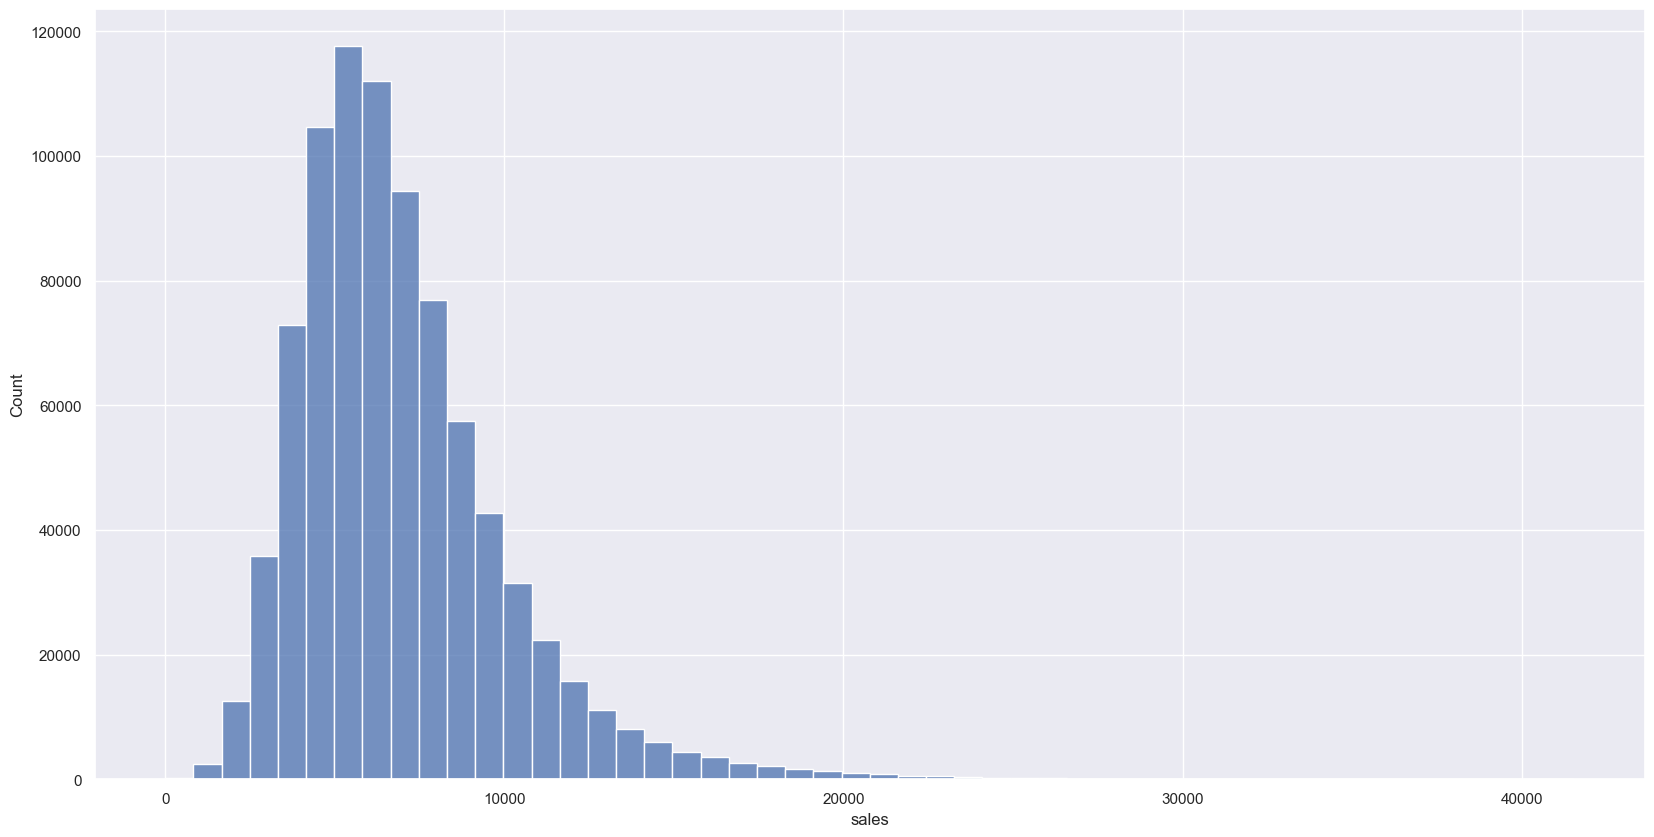

In [35]:
sns.histplot (df4['sales'], bins = 50)

In [ ]:
## Observações:

## Skew positiva, maioria de vendas(volume-frequência) mais próximo de valores menores do range, média é maior que a mediana. Vendas bastante concentradas em 600 a 700 vendas.

### 4.1.2. Numerical Variable

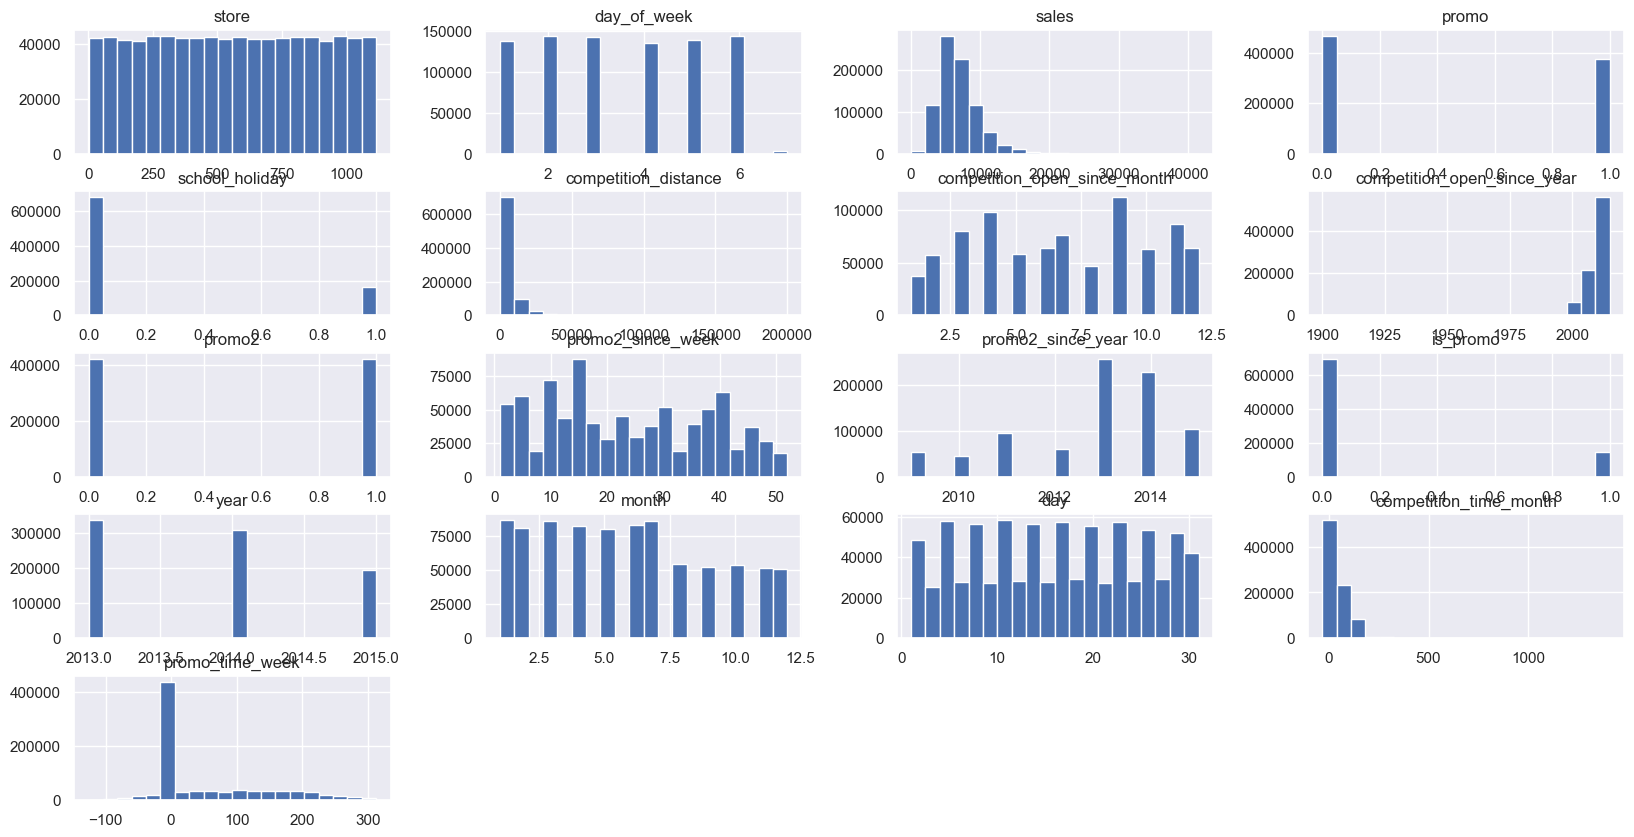

In [48]:
num_attributes_eda.hist( bins = 25 );

In [ ]:
## Observações

## Competition Distance

### Maior frequência/volume de valores(registros de vendas) menores, o que significa que grande parte das lojas possuem competidores bem próximos.

## store

### bem linear pois é um diferente do outro.-bem semelhante a frequencia de cada loja no histórico

## day_of_week

### Dias bem parelhos em termos de frequência no dataset. Dia 7 com bem menos volume de registro, talvez porque era dia da loja estar fechada.

## promo 

### Existem um pouco mais de registros no dataset de dias de vendas nas lojas sem promoção do que com.

## school_holiday 

### Existem mais registros no dataset de dias de vendas nas lojas sem feriado escolar do que com feriado, mas ainda possui registros com o feriado da escola.

### 4.1.3. Categorical Variable

In [44]:
# Valores únicos de cada uma das categorias 

cat_attributes_eda.apply( lambda x: x.nunique() )

state_holiday      4
store_type         4
assortment         3
week_of_year      52
year_week        137
dtype: int64

#### 4.1.3.1. state_holiday

<AxesSubplot:xlabel='state_holiday', ylabel='Count'>

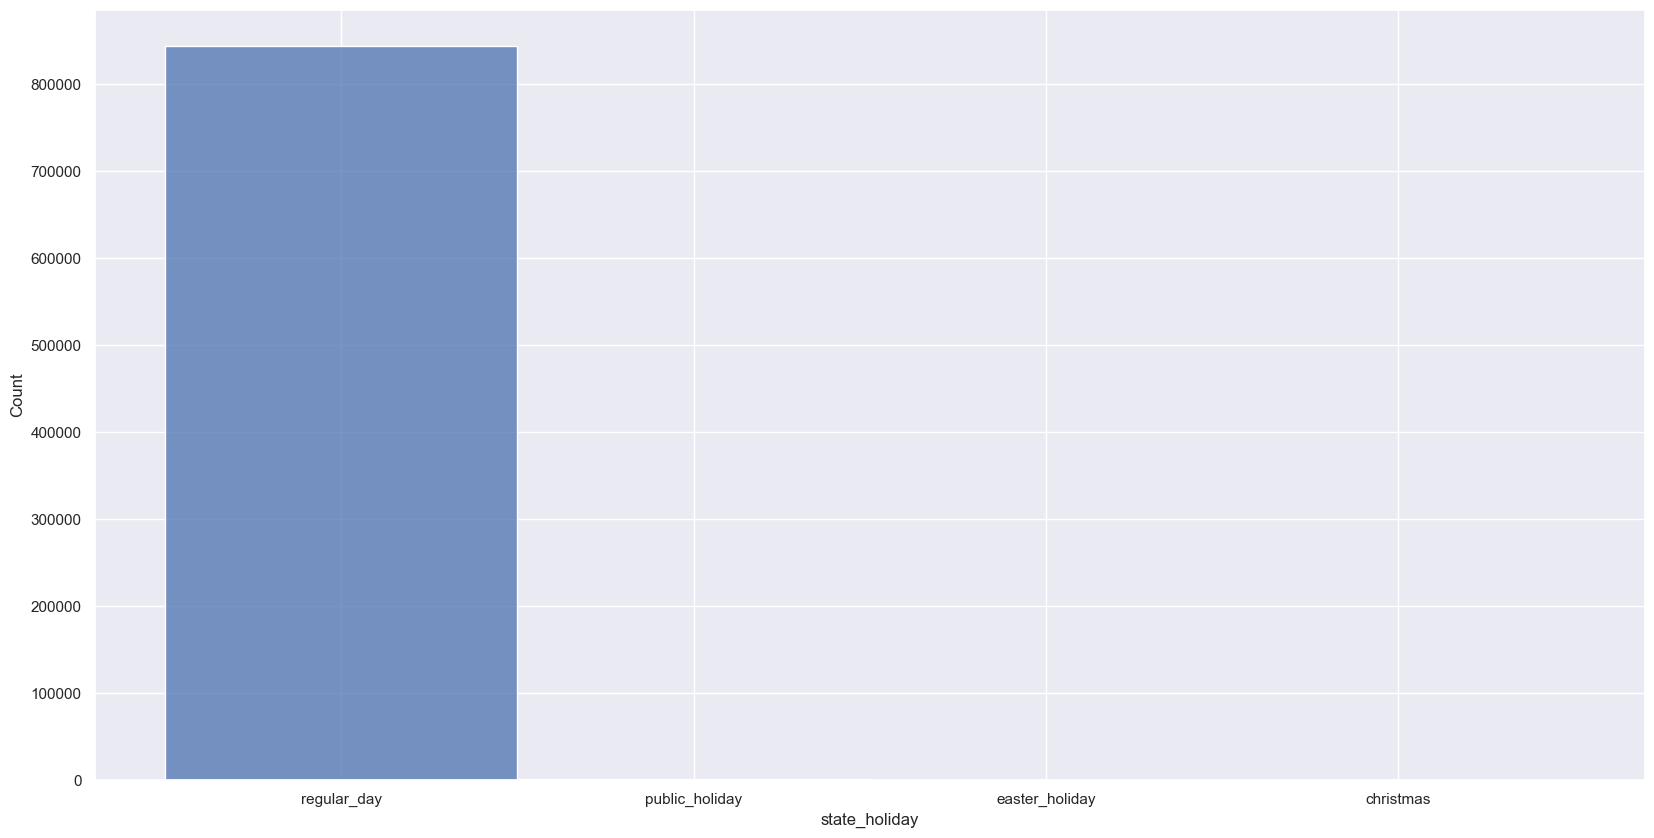

In [45]:
sns.histplot(df4['state_holiday'])

In [ ]:
## State Holiday

### Maior frequência/volume de valores(registros de vendas) ocorre em dias regulares. > 800k ocorrências contra faixa de 700 de outros dias

<AxesSubplot:xlabel='sales', ylabel='Density'>

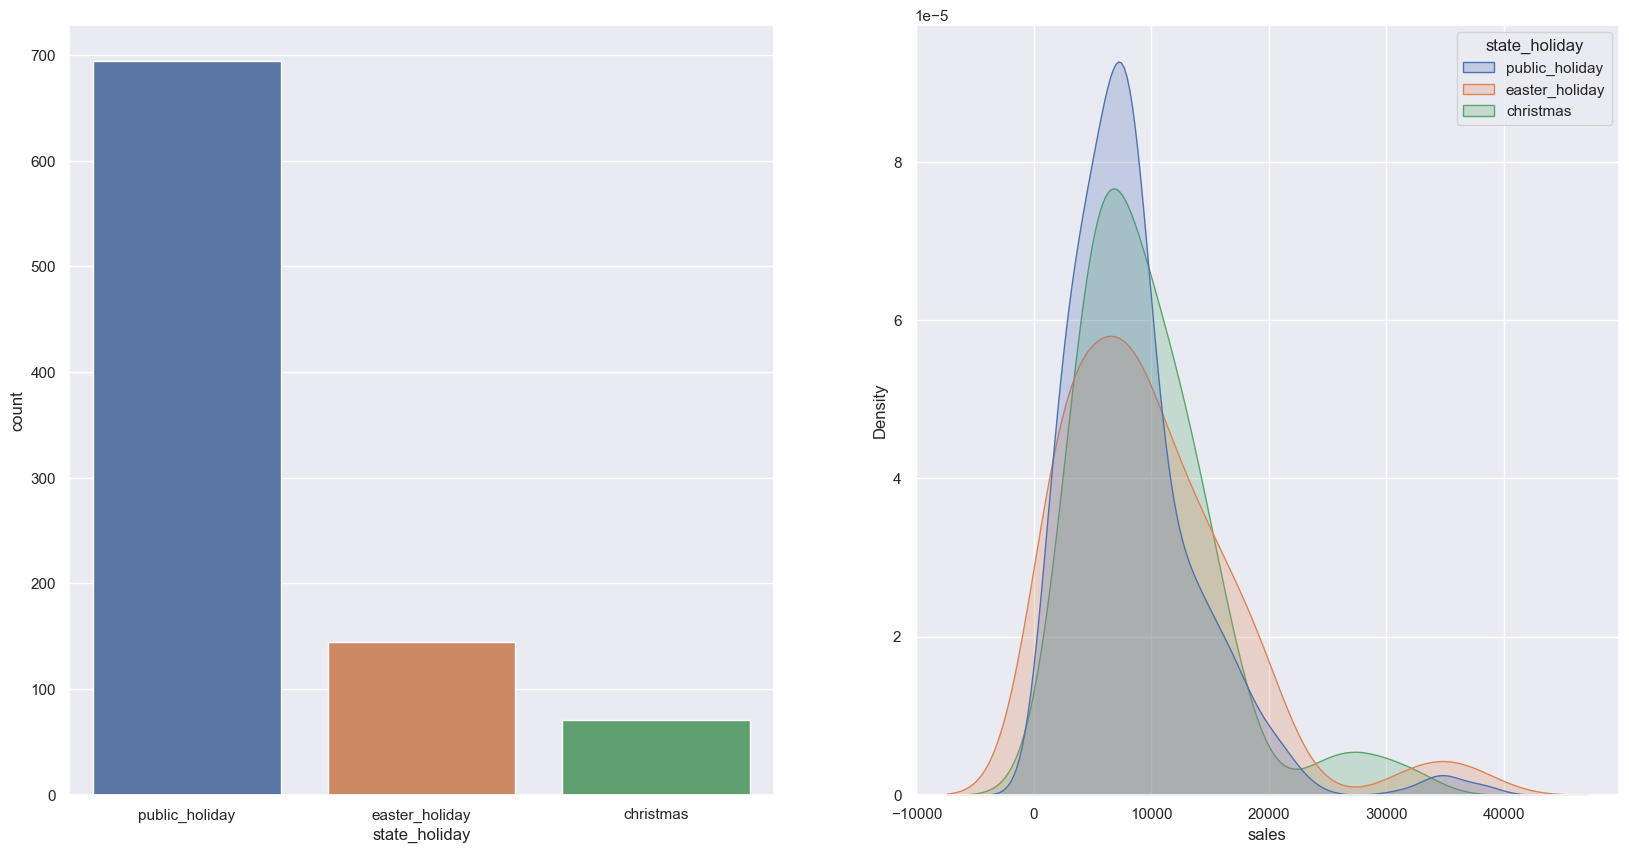

In [68]:
# Retirando os regular_day para verificar apenas dias em que são feriados e a loja abriu

a = df4[ df4['state_holiday'] != 'regular_day' ]
plt.subplot( 1, 2, 1 )
sns.countplot(x = a['state_holiday'])

plt.subplot( 1, 2, 2 )
sns.kdeplot(data=a , x='sales', hue='state_holiday', fill=True, common_norm=False )

In [ ]:
### Maior frequência/volume de valores(registros de vendas) ocorre em feriados públicos > páscoa > natal. Aparentemente pelo gráfico de distribuição de vendas por feriado, as médias de vendas no natal e páscoa são
### maiores que as de feriados públicos

#### 4.1.3.2. store_type

<AxesSubplot:xlabel='sales', ylabel='Density'>

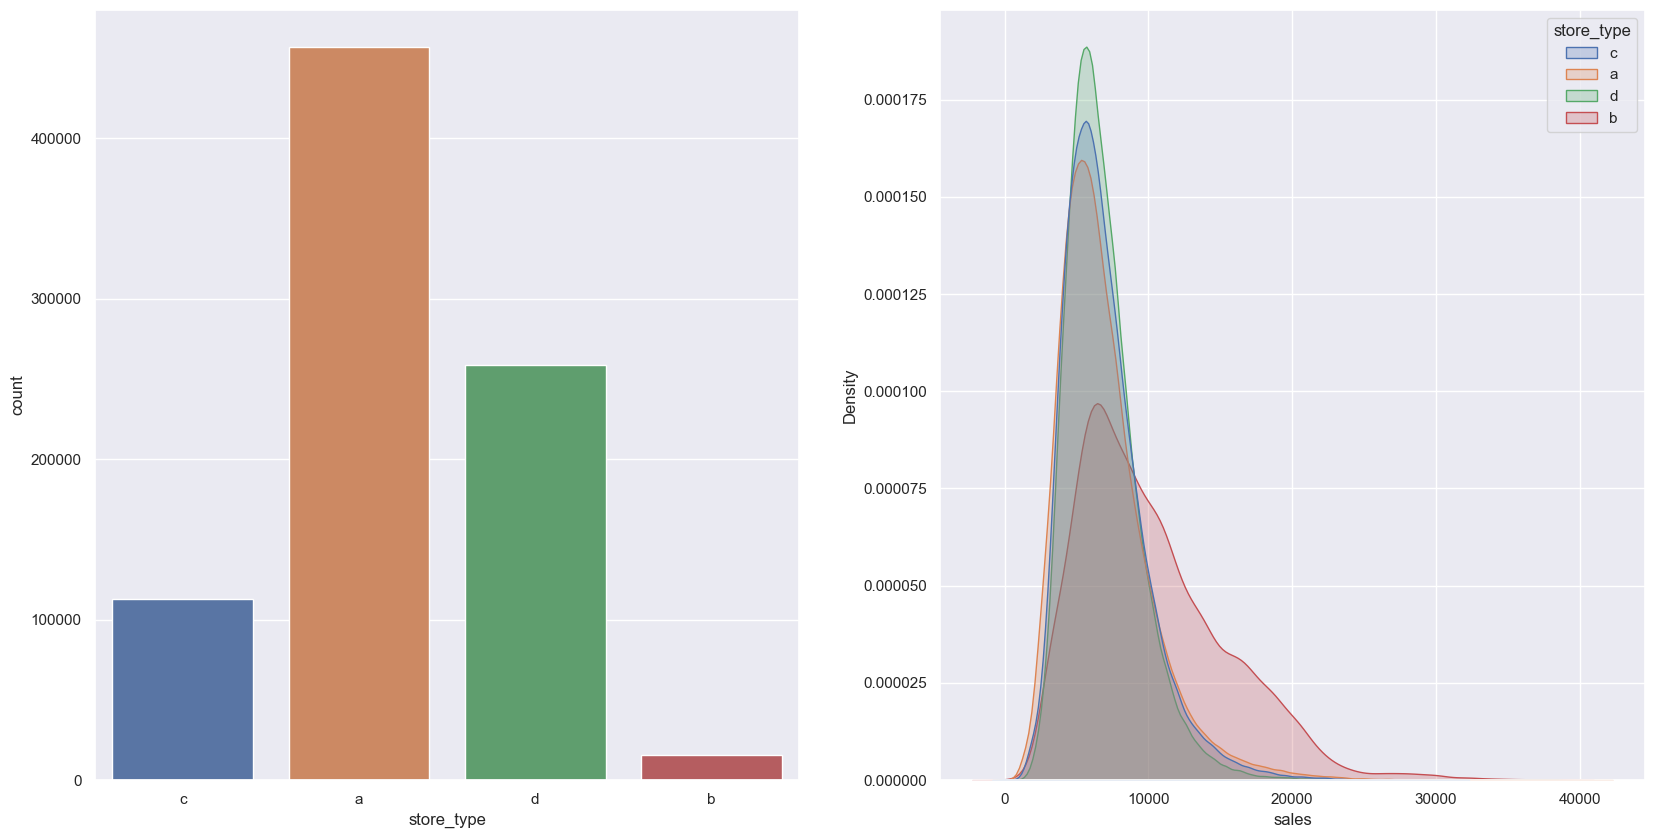

In [70]:
plt.subplot( 1, 2, 1 )
sns.countplot(x = df4['store_type'])

plt.subplot( 1, 2, 2 )
sns.kdeplot(data= df4 , x='sales', hue='store_type', fill=True, common_norm=False )

In [ ]:
### Maior frequência/volume de valores(registros de vendas) ocorre em tipos de lojas a >> d >> c >> b. Aparentemente pelo gráfico de distribuição de vendas por tipo de loja, a média de vendas no tipo de loja b é 
### maior que a média de vendas em outros tipos de loja que possuem distribuição mais similares entre si. 

## VARIÁVEL APARENTEMENTE RELEVANTE PARA O MODELO

#### 4.1.3.3. assortment

<AxesSubplot:xlabel='sales', ylabel='Density'>

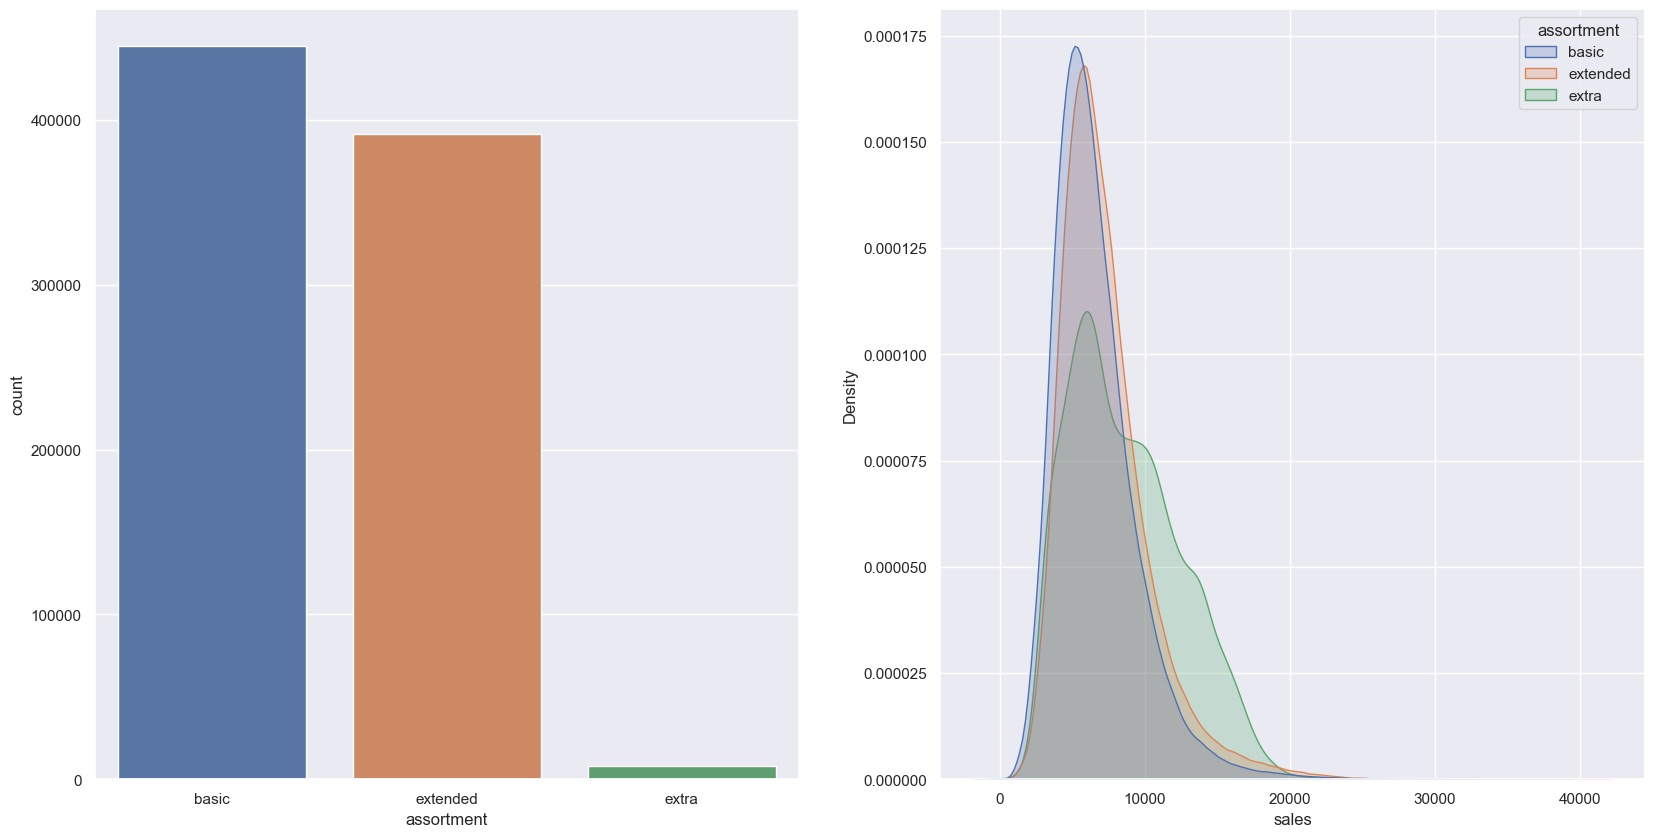

In [73]:
plt.subplot( 1, 2, 1 )
sns.countplot(x = df4['assortment'])

plt.subplot( 1, 2, 2 )
sns.kdeplot(data= df4 , x='sales', hue='assortment', fill=True, common_norm=False )

In [ ]:
### Maior frequência/volume de valores(registros de vendas) ocorre em lojas com sortimento de produtos basic >= extended >>> extra. Aparentemente pelo gráfico de distribuição de vendas por sortimento de produtos 
## das lojas, a média de vendas em lojas extra é maior que a média de vendas em outros tipos de loja que possuem distribuição mais similares entre si. 

## VARIÁVEL APARENTEMENTE RELEVANTE PARA O MODELO

#### 4.1.3.4. week_of_year

C:\Users\alanc\anaconda3\envs\prediction_sales\lib\site-packages\seaborn\distributions.py:497: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
C:\Users\alanc\anaconda3\envs\prediction_sales\lib\site-packages\seaborn\distributions.py:498: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


<AxesSubplot:xlabel='week_of_year', ylabel='Count'>

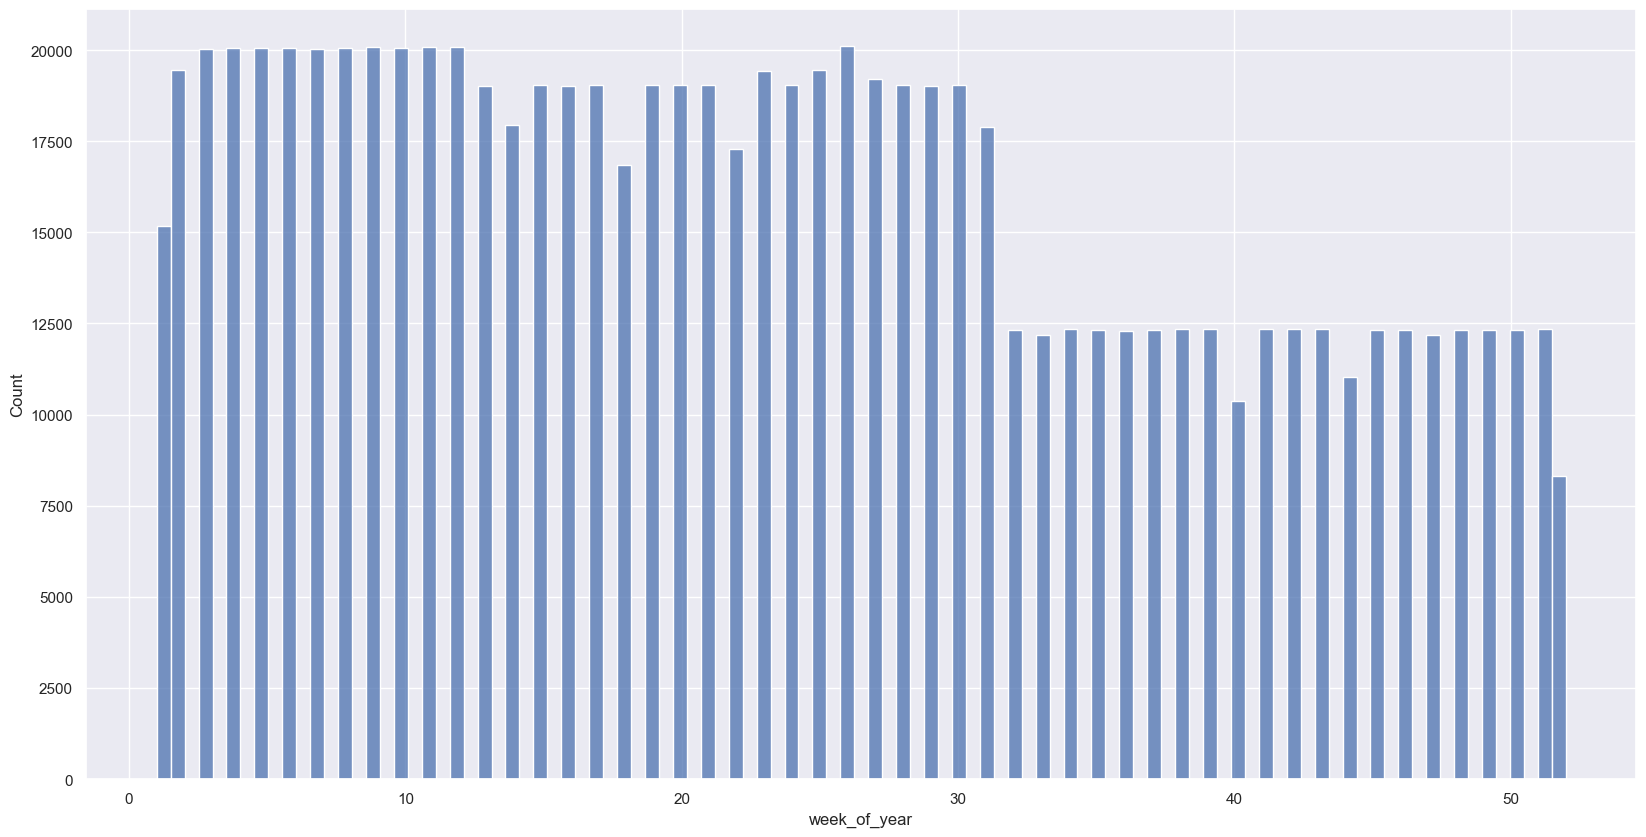

In [75]:
sns.histplot(x = df4['week_of_year'])

#### 4.1.3.5. year_week

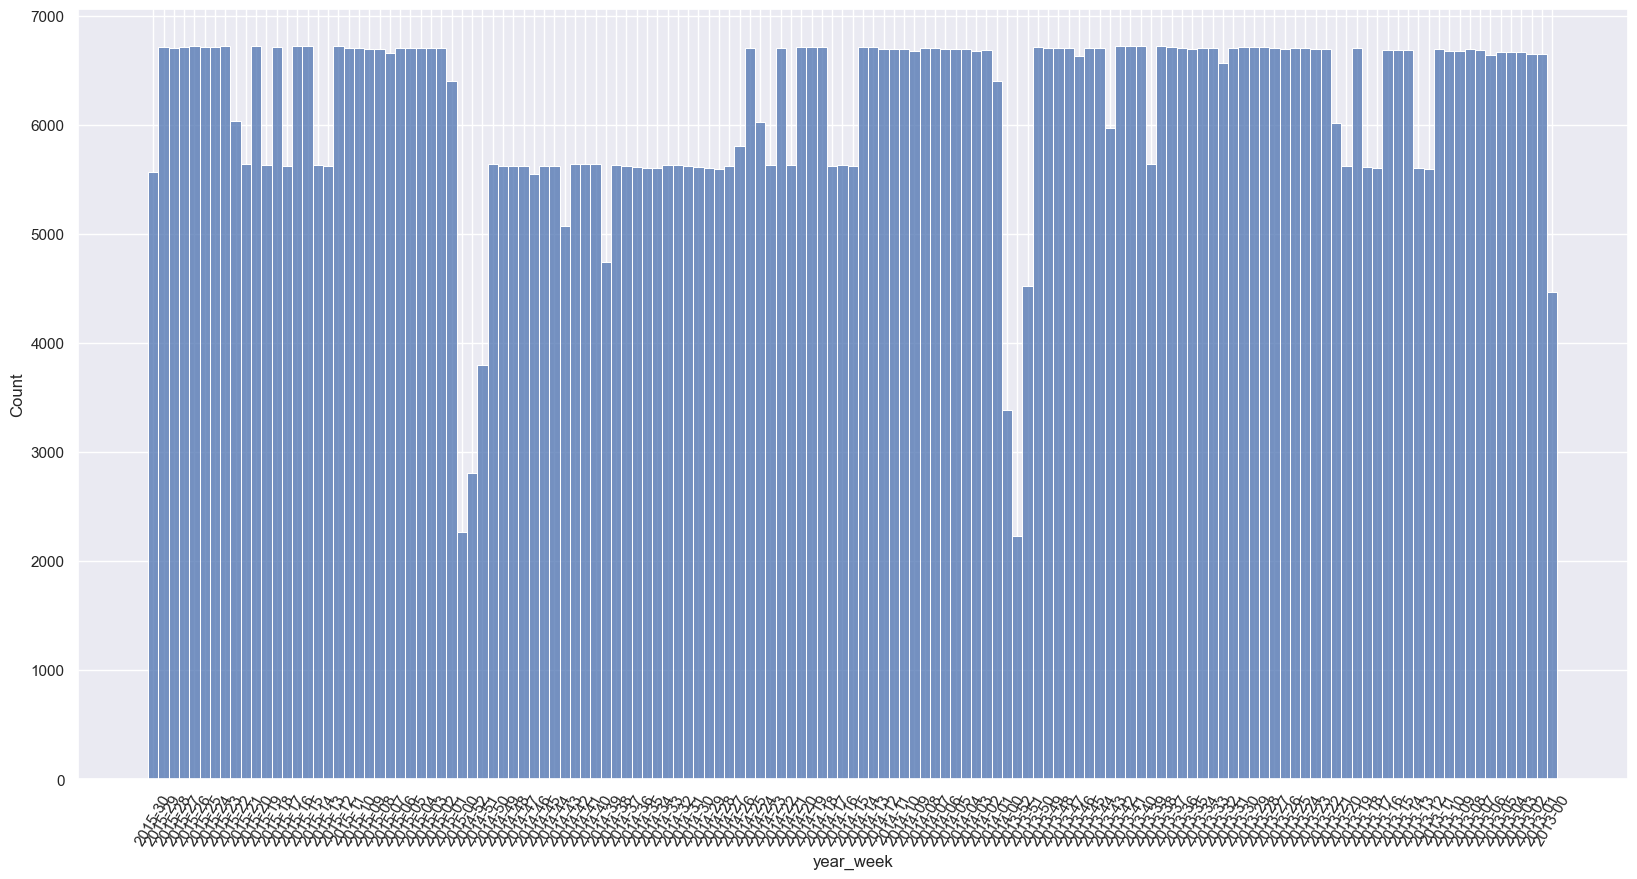

In [62]:
sns.histplot(df4['year_week']);
plt.xticks(rotation=60);

## 4.2. Análise Bivariada

Validação das Hipóteses

### 4.2.1.  H1. Lojas com maior sortimentos deveriam vender mais, em média. VERDADEIRO

In [ ]:
### Assumindo:

## 1. Ordem de grandeza de sortimento por classificação: extra > extended > basic

In [56]:
## Média de vendas das lojas por classificação de sortimento de produtos 

aux1 = df4[['sales','assortment']].groupby("assortment").mean().reset_index()
df4[['sales','assortment']].groupby("assortment").mean()

,sales
assortment,
basic,6621.02
extended,7300.53
extra,8639.35


Text(0.5, 1.0, 'Mean Sales per Store Assortment')

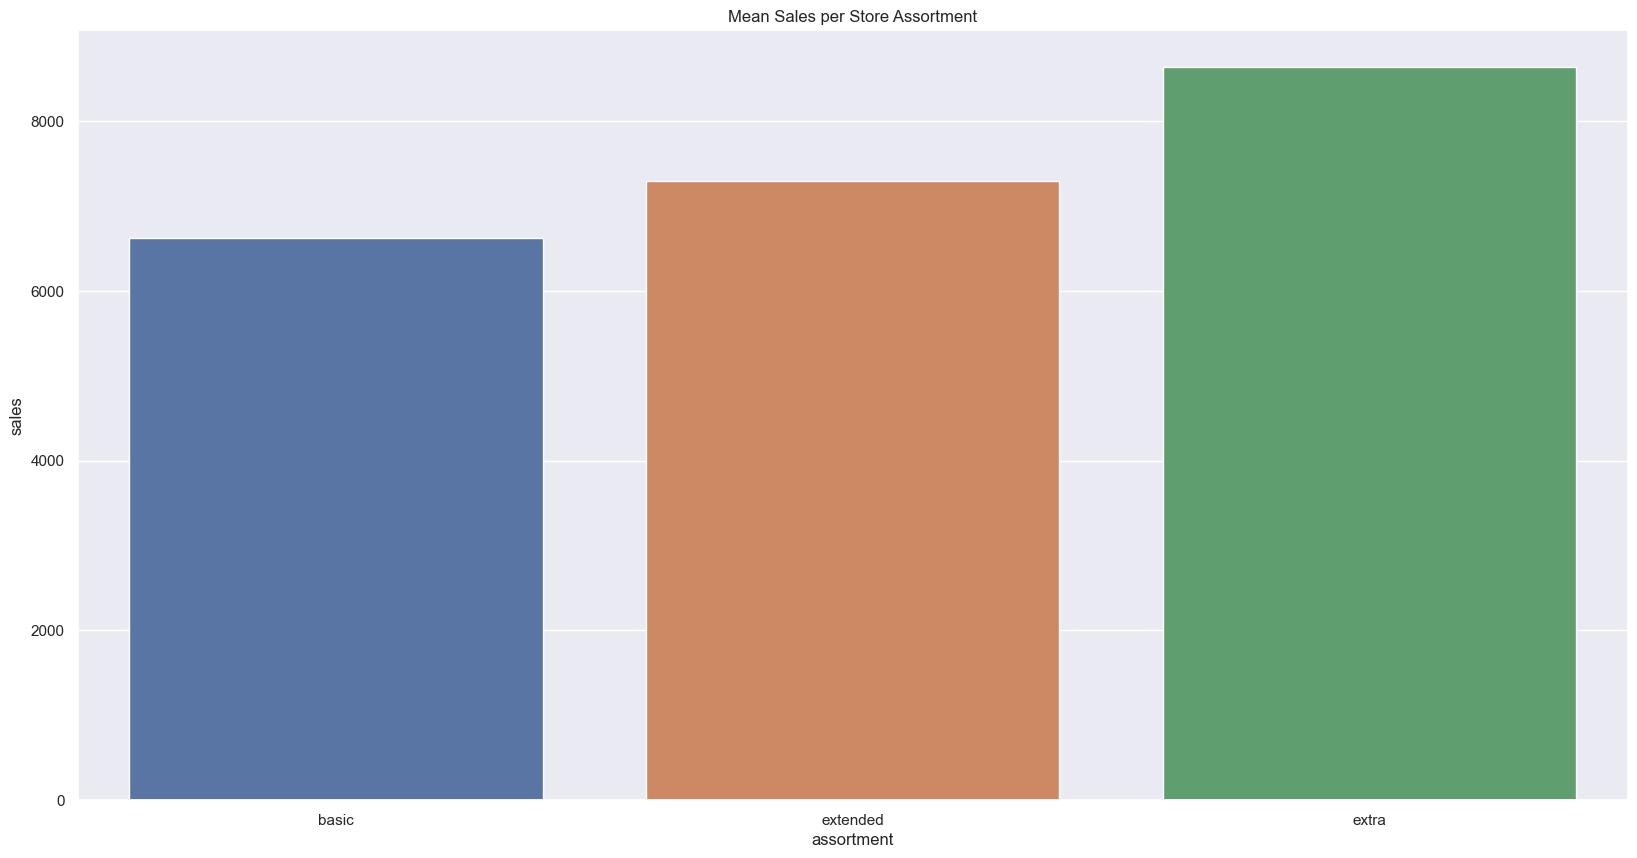

In [98]:
sns.barplot(data = aux1 , x = 'assortment' , y = 'sales').set_title("Mean Sales per Store Assortment")


In [105]:
### Média de vendas de lojas por semana do ano por sortimento - (Investigando além)

aux2 = df4[['sales','assortment','year_week']].groupby(['year_week',"assortment"]).mean().reset_index()
df4[['sales','assortment','year_week']].groupby(['year_week',"assortment"]).mean()

sales
year_week assortment        
2013-00   basic      5642.28
          extended   6094.00
          extra      5282.43
2013-01   basic      7307.46
          extended   7553.62
...                      ...
2015-29   extended   6327.46
          extra      9111.43
2015-30   basic      7950.07
          extended   9084.51
          extra      9704.20

[411 rows x 1 columns]

Text(0.5, 1.0, 'Mean Sales per Week of Year per Store Assortment')

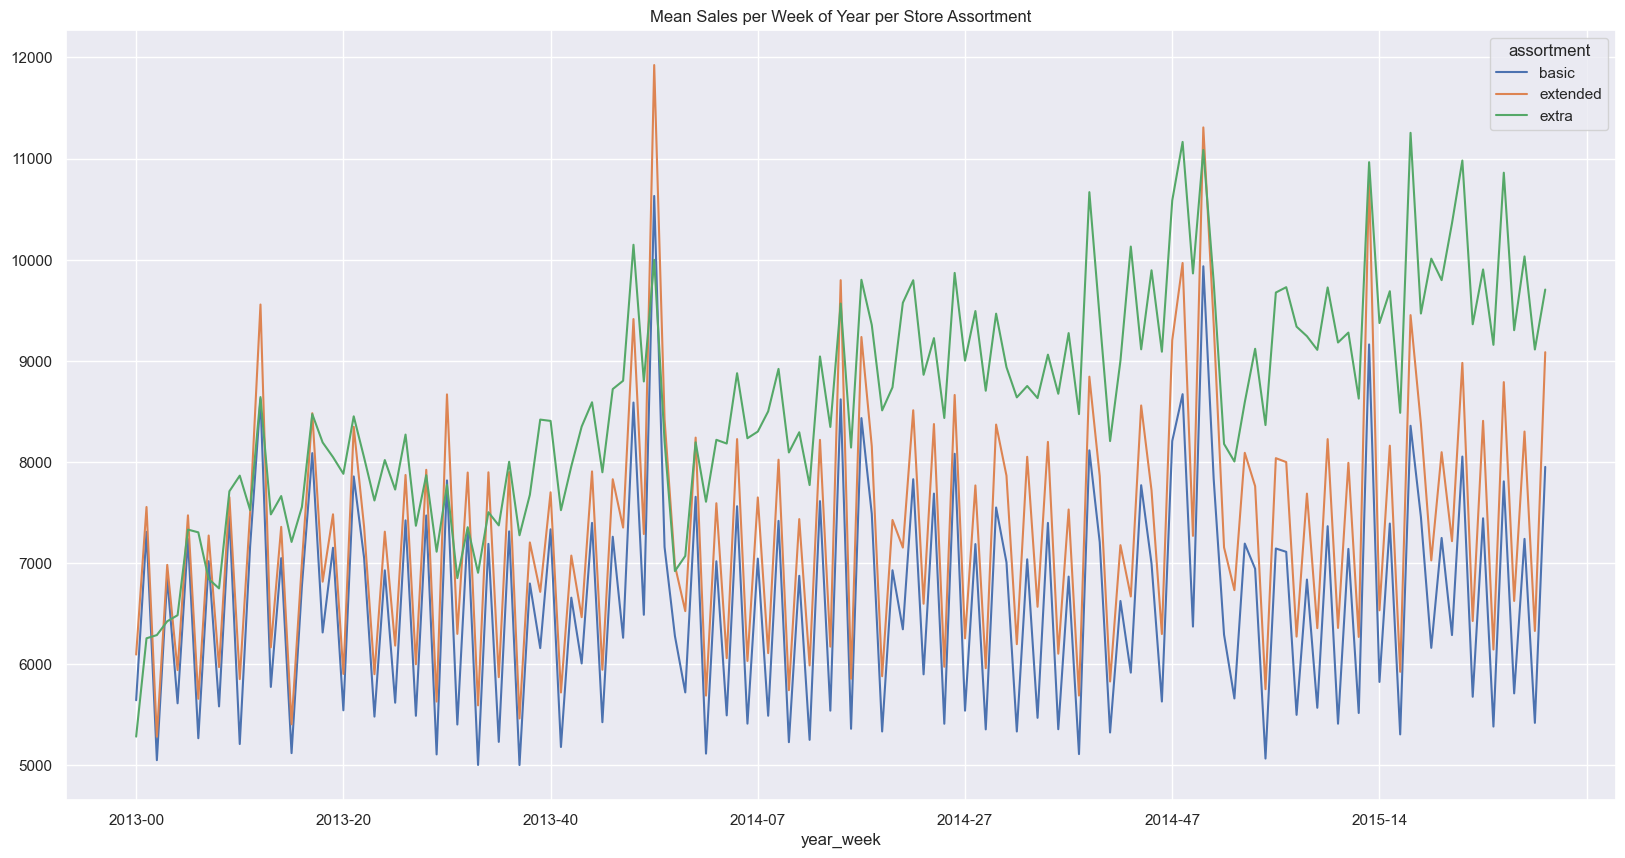

In [106]:
aux2.pivot_table(index = 'year_week', columns = 'assortment', values = 'sales').plot().set_title("Mean Sales per Week of Year per Store Assortment")

#### 4.2.1.1. Período de registros de venda (date)

In [77]:
# 01/01/2013

df4['date'].min()

Timestamp('2013-01-01 00:00:00')

In [78]:
# 31/07/2015

df4['date'].max()

Timestamp('2015-07-31 00:00:00')

In [ ]:
## Existem 1017209 combinações (registros) de datas com lojas referentes a quantidade de vendas

#### 4.2.1.2. Quantidade de Lojas únicas 

In [80]:
df4['store'].nunique()

1115

In [81]:
# Quais?

df4['store'].sort_values().unique()


array([   1,    2,    3, ..., 1113, 1114, 1115], dtype=int64)

#### 4.2.1.3. Quantidade de Lojas únicas por sortimento

In [85]:
df4[['store','assortment']].groupby('assortment').nunique()

,store
assortment,
basic,593
extended,513
extra,9


#### 4.2.1.4. Datas únicas em registro

In [86]:
df4['date'].nunique()

942

#### 4.2.1.5. Quantidade de lojas distintas abertas por data 

In [89]:
df4[['store','date']].groupby('date').nunique().head(40)

,store
date,
2013-01-01,17
2013-01-02,1111
2013-01-03,1109
2013-01-04,1108
2013-01-05,1107
2013-01-06,19
2013-01-07,1106
2013-01-08,1105
2013-01-09,1105


<AxesSubplot:xlabel='date'>

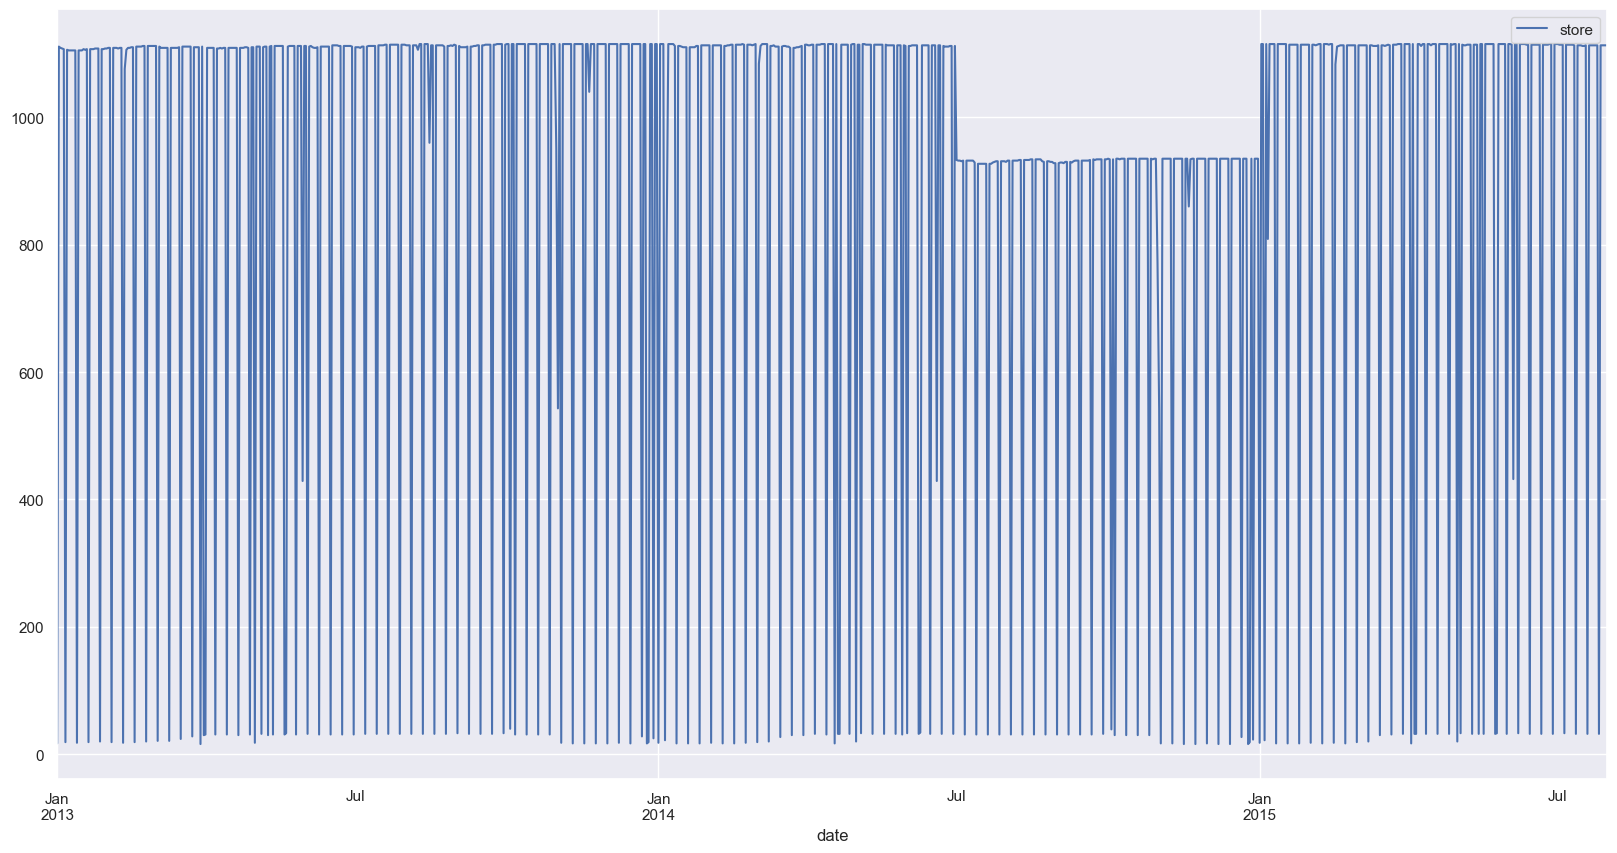

In [88]:
df4[['store','date']].groupby('date').nunique().plot()

#### 4.2.1.5. Quantidade de lojas distintas abertas por semana de ano 

In [90]:
df4[['store','year_week']].groupby('year_week').nunique().head(40)

,store
year_week,
2013-00,1111
2013-01,1106
2013-02,1107
2013-03,1108
2013-04,1109
2013-05,1110
2013-06,1111
2013-07,1112
2013-08,1112


<AxesSubplot:xlabel='year_week'>

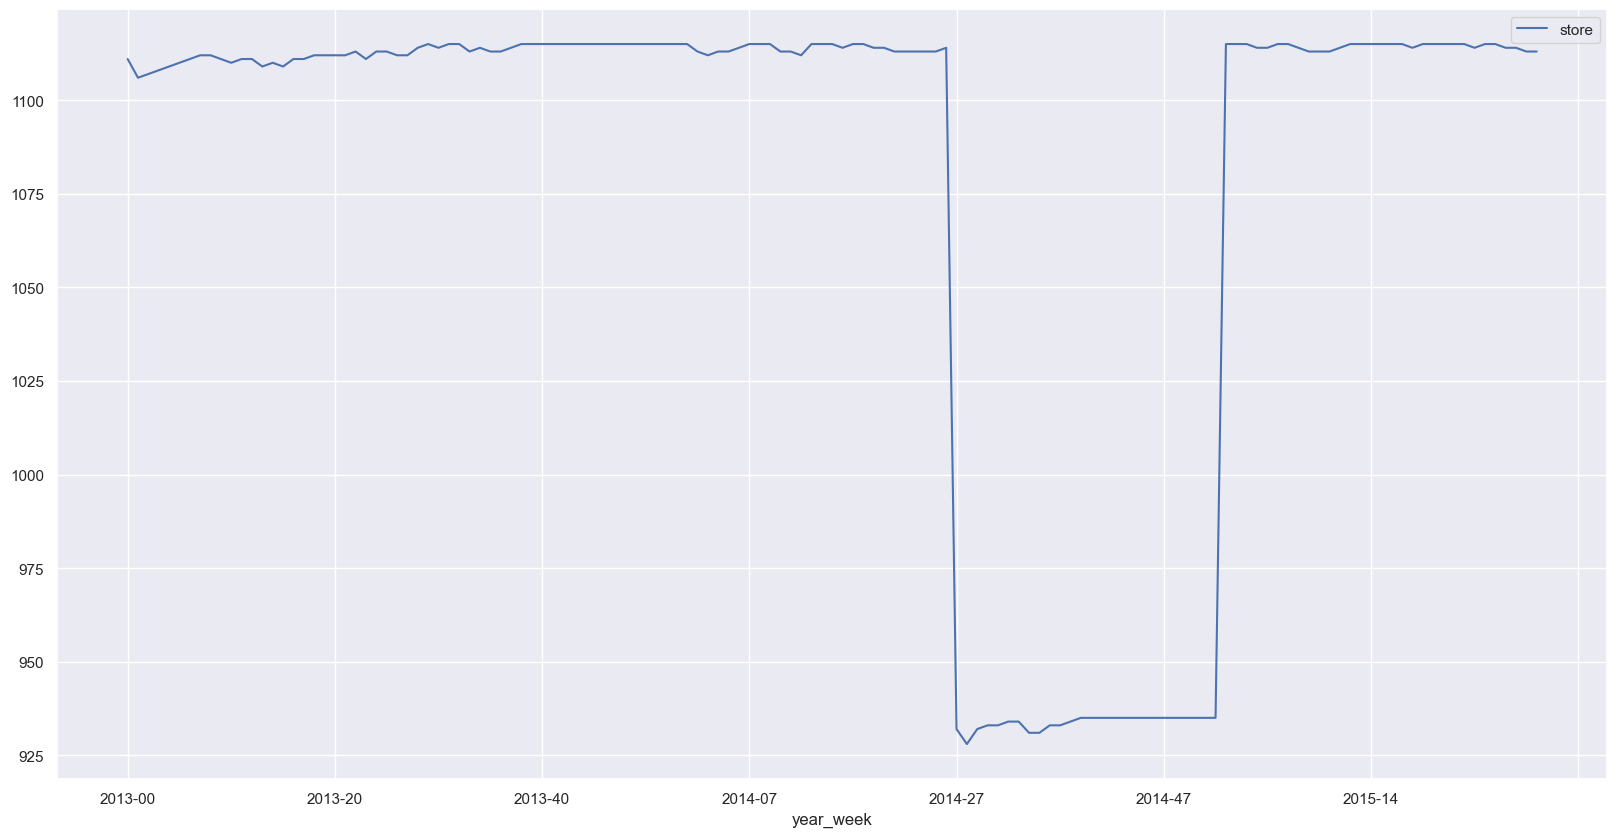

In [91]:
df4[['store','year_week']].groupby('year_week').nunique().plot()

#### 4.2.1.6. Quantidade de lojas distintas abertas por semana do ano por sortimento 

In [100]:
df4[['store','year_week','assortment']].groupby(['year_week','assortment']).nunique().head(40)

store
year_week assortment       
2013-00   basic         592
          extended      510
          extra           9
2013-01   basic         592
          extended      506
          extra           8
2013-02   basic         592
          extended      506
          extra           9
2013-03   basic         592
          extended      507
          extra           9
2013-04   basic         592
          extended      509
          extra           8
2013-05   basic         592
          extended      509
          extra           9
2013-06   basic         592
          extended      510
          extra           9
2013-07   basic         592
          extended      511
          extra           9
2013-08   basic         592
          extended      511
          extra           9
2013-09   basic         592
          extended      510
          extra           9
2013-10   basic         592
          extended      510
          extra           8
2013-11   basic         592
          extended      511
          extra           8
2013-12   basic         592
          extended      510
          extra           9
2013-13   basic         592

<AxesSubplot:xlabel='year_week'>

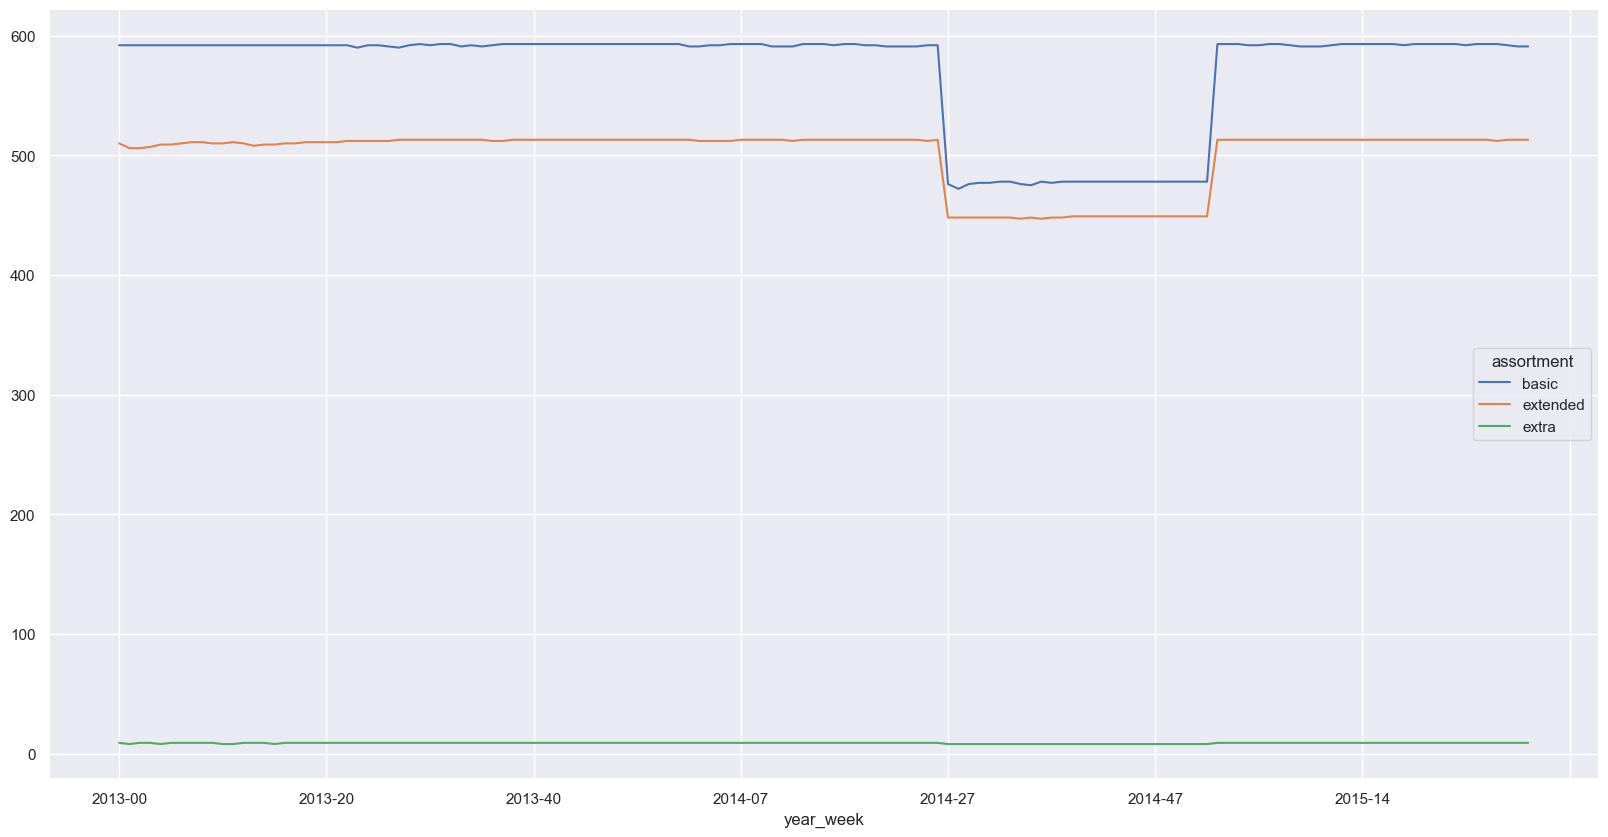

In [104]:
aux3 = df4[['store','year_week','assortment']].groupby(['year_week','assortment']).nunique().reset_index()
aux3.pivot_table(index = 'year_week', columns = 'assortment', values = 'store').plot()

### 4.2.2. H2. Lojas com competidores mais próximos deveriam vender menos, em média. 
**FALSO:** Lojas com competidores mais próximos não vendem menos, mas também não vendem mais. 

Venda não tem proporcionalidade com a distância do competidor.

#### 4.2.2.1. Distribuição das distância de competidores no dataset

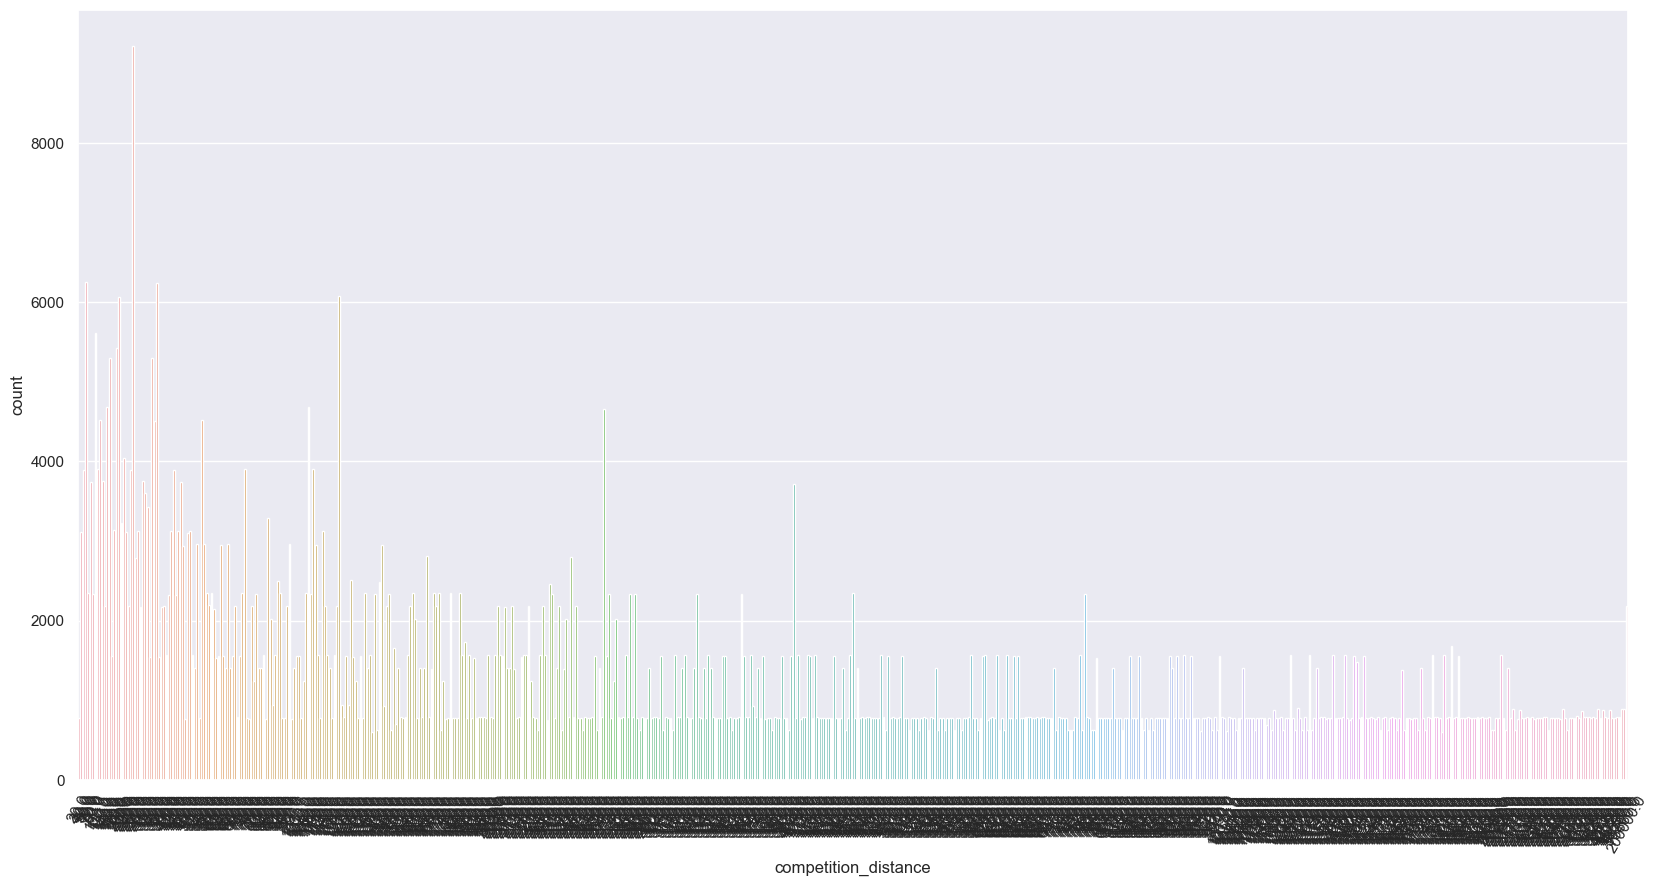

In [37]:
sns.countplot(x = df4['competition_distance'])
plt.xticks(rotation=60);

#### 4.2.2.2. Desenvolvimento 

In [28]:
aux4 = df4[['sales','competition_distance']].groupby('competition_distance').mean().reset_index()
df4[['sales','competition_distance']].groupby('competition_distance').mean()

,sales
competition_distance,
20.00,5879.08
30.00,5633.08
40.00,7522.27
50.00,9735.29
60.00,9431.41
...,...
46590.00,4534.43
48330.00,4845.23
58260.00,6462.01


<AxesSubplot:xlabel='competition_distance', ylabel='sales'>

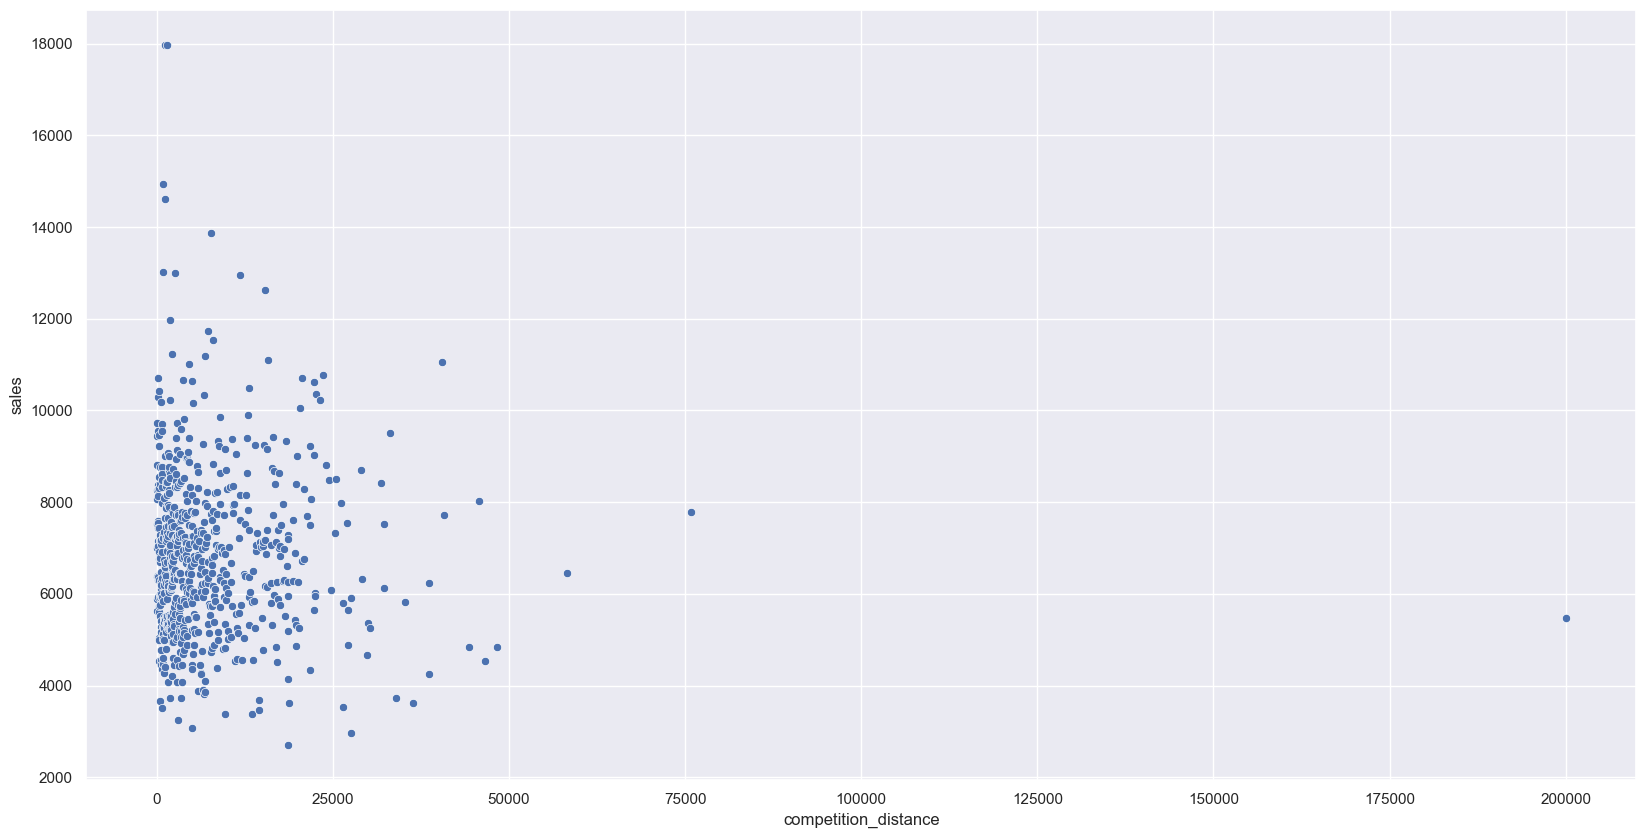

In [109]:
## Quando tenho duas variáveis numéricas bem granulares

sns.scatterplot(data= aux4, x="competition_distance", y="sales")


In [45]:
## Criando variável categórica quantitativa para juntar as distâncias

bins = list(np.arange(0, 200001, 10000))

aux4["competition_distance_grouped"] = pd.cut( aux4["competition_distance"] , bins = bins )

In [46]:
## Agrupando datataset por distância do competidor agrupada

aux5 = aux4[['sales','competition_distance_grouped']].groupby("competition_distance_grouped").mean().reset_index()
aux4[['sales','competition_distance_grouped']].groupby("competition_distance_grouped").mean()

,sales
competition_distance_grouped,
"(0, 10000]",6848.64
"(10000, 20000]",6794.68
"(20000, 30000]",7296.10
"(30000, 40000]",5986.79
"(40000, 50000]",6833.15
"(50000, 60000]",6462.01
"(60000, 70000]",NaN
"(70000, 80000]",7775.45
"(80000, 90000]",NaN


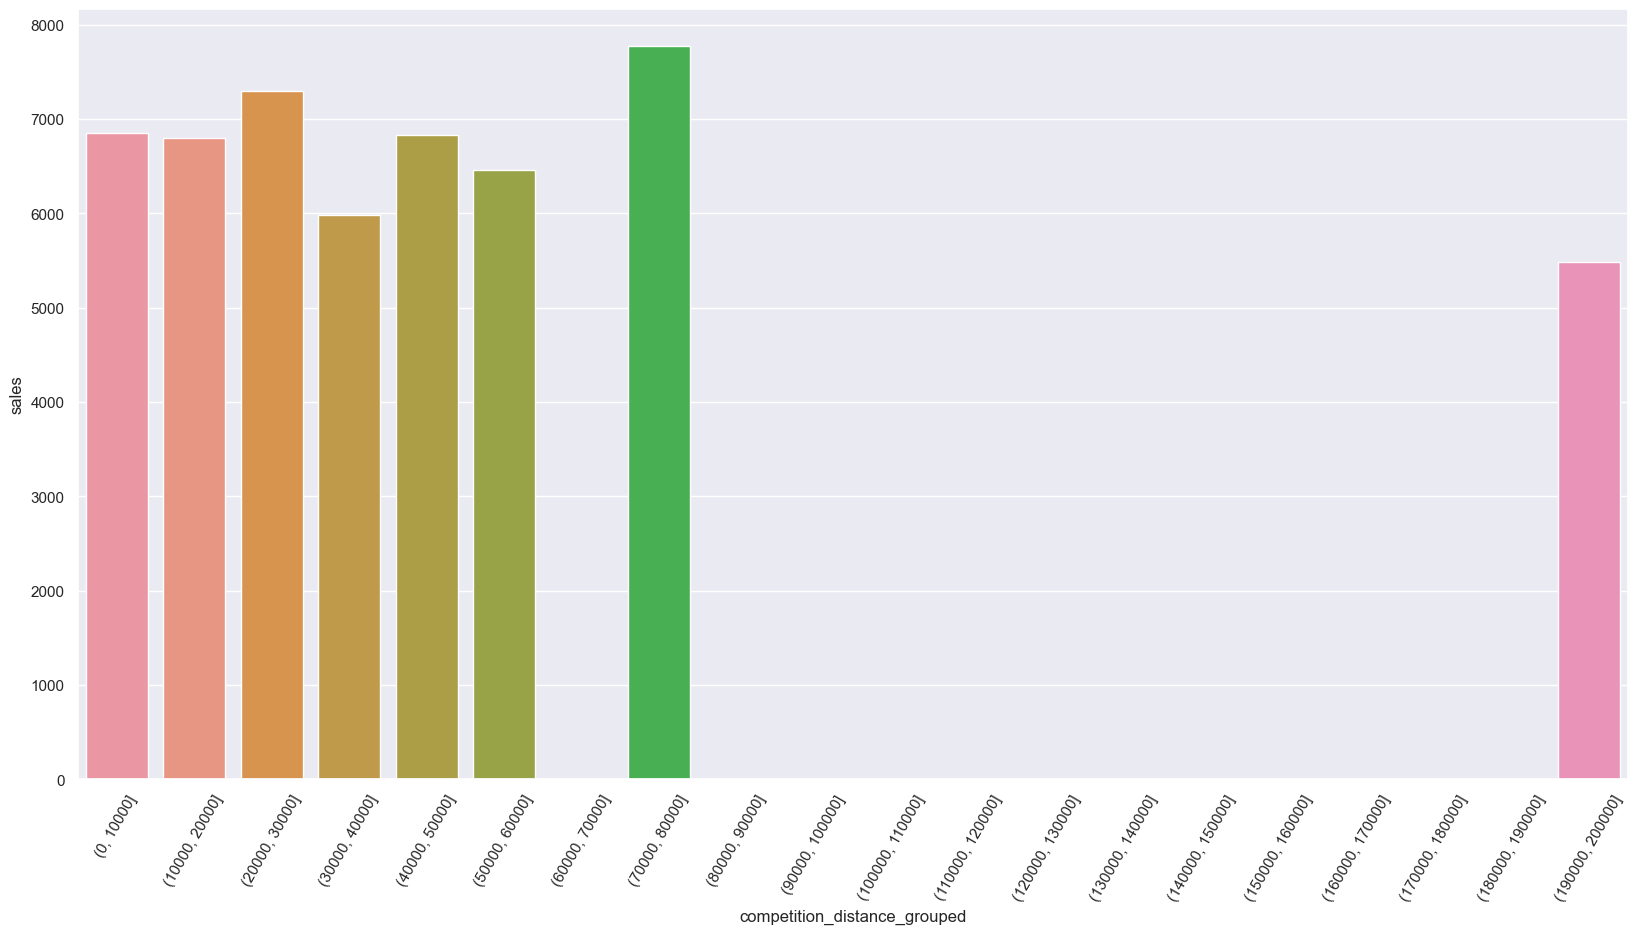

In [49]:
## Gráfico de Barras para analisar a venda média por grupos de lojas com distância de competidor próximas

sns.barplot(x = 'competition_distance_grouped' , y = 'sales' , data = aux5);
plt.xticks(rotation = 60);

In [ ]:
## Correlação entre as variáveis

<AxesSubplot:>

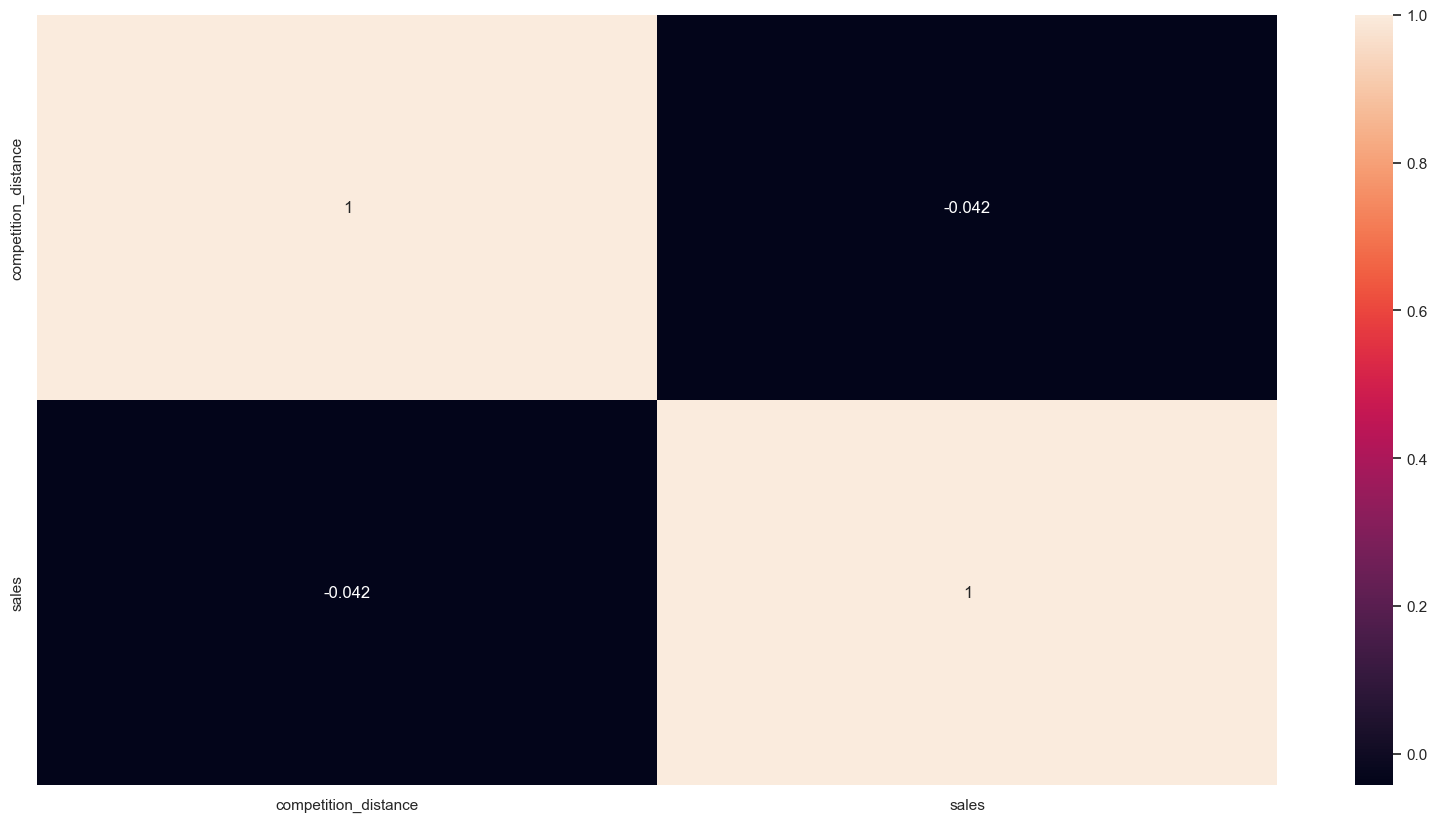

In [53]:
sns.heatmap( df4[['competition_distance','sales']].corr( method = 'pearson' ), annot = True )

#### 4.2.2.3. Dashboard 

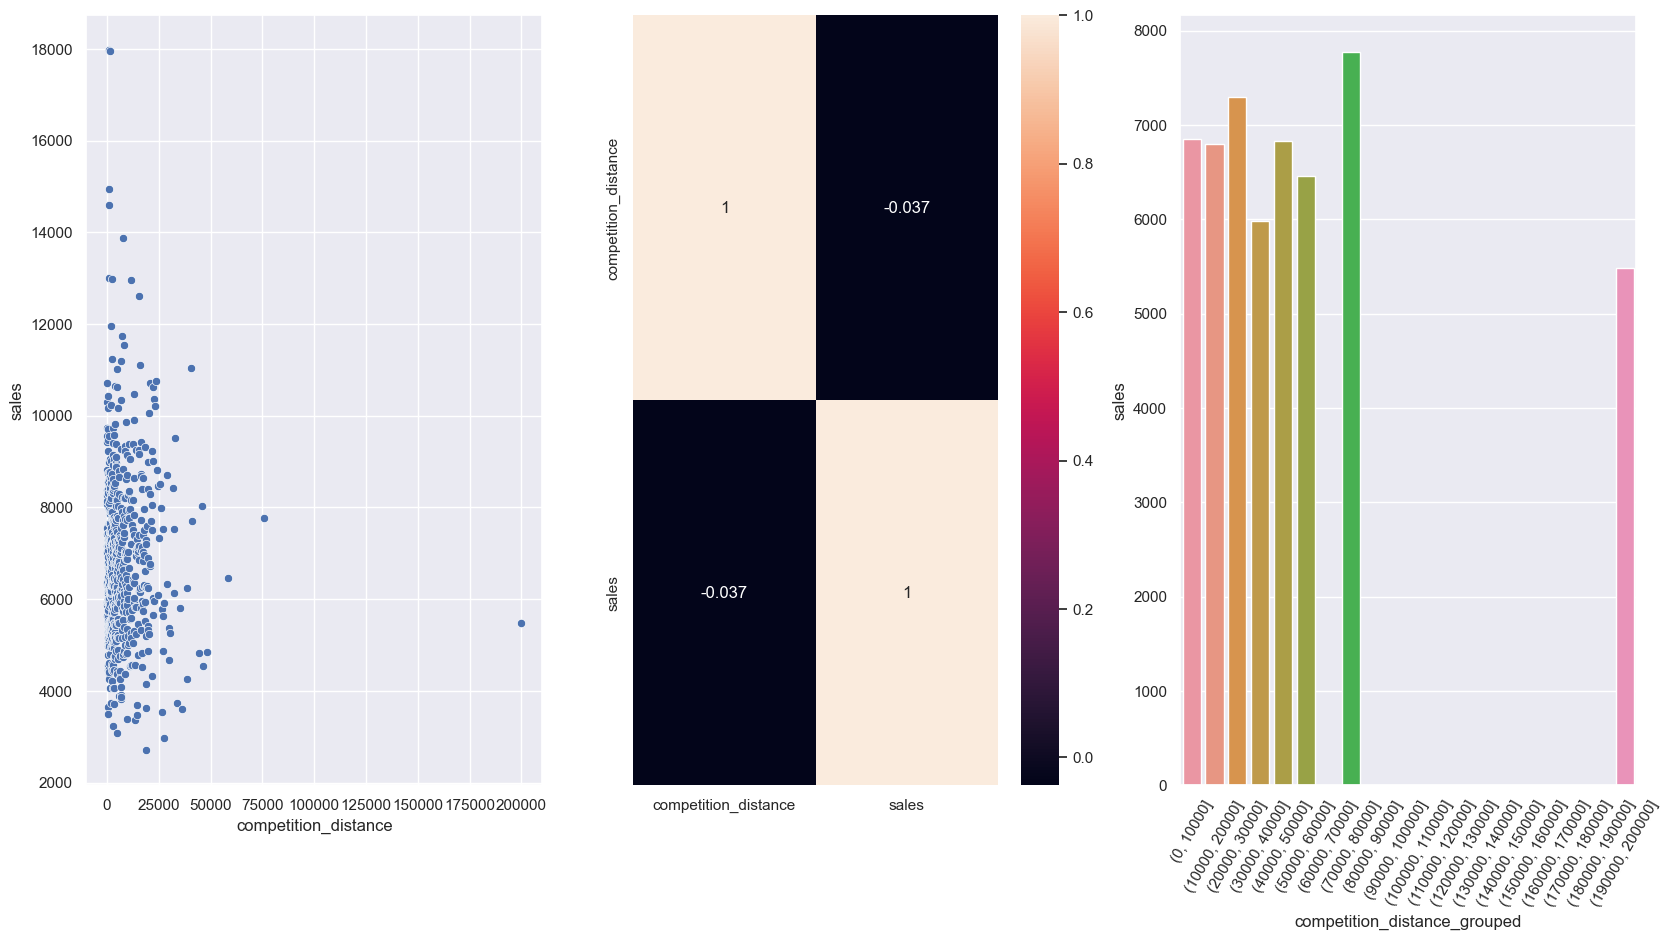

In [54]:
# 1

aux4 = df4[['sales','competition_distance']].groupby('competition_distance').mean().reset_index()

plt.subplot( 1, 3, 1)
sns.scatterplot(data= aux4, x="competition_distance", y="sales")

# 2

plt.subplot( 1, 3, 2)
sns.heatmap( aux4.corr( method = 'pearson' ), annot = True )

# 3

bins = list(np.arange(0, 200001, 10000))

aux4["competition_distance_grouped"] = pd.cut( aux4["competition_distance"] , bins = bins )

aux5 = aux4[['sales','competition_distance_grouped']].groupby("competition_distance_grouped").mean().reset_index()

plt.subplot( 1, 3, 3)
sns.barplot(x = 'competition_distance_grouped' , y = 'sales' , data = aux5);
plt.xticks(rotation = 60);


### 4.2.3. H3. Lojas com competidores à mais tempo deveriam vender mais em média. VERDADEIRO

Boa correlação entre as variáveis sales e tempo de competidor existente

#### 4.2.3.1. Análise Univariada 'competition_time_month'

<AxesSubplot:xlabel='competition_time_month', ylabel='Count'>

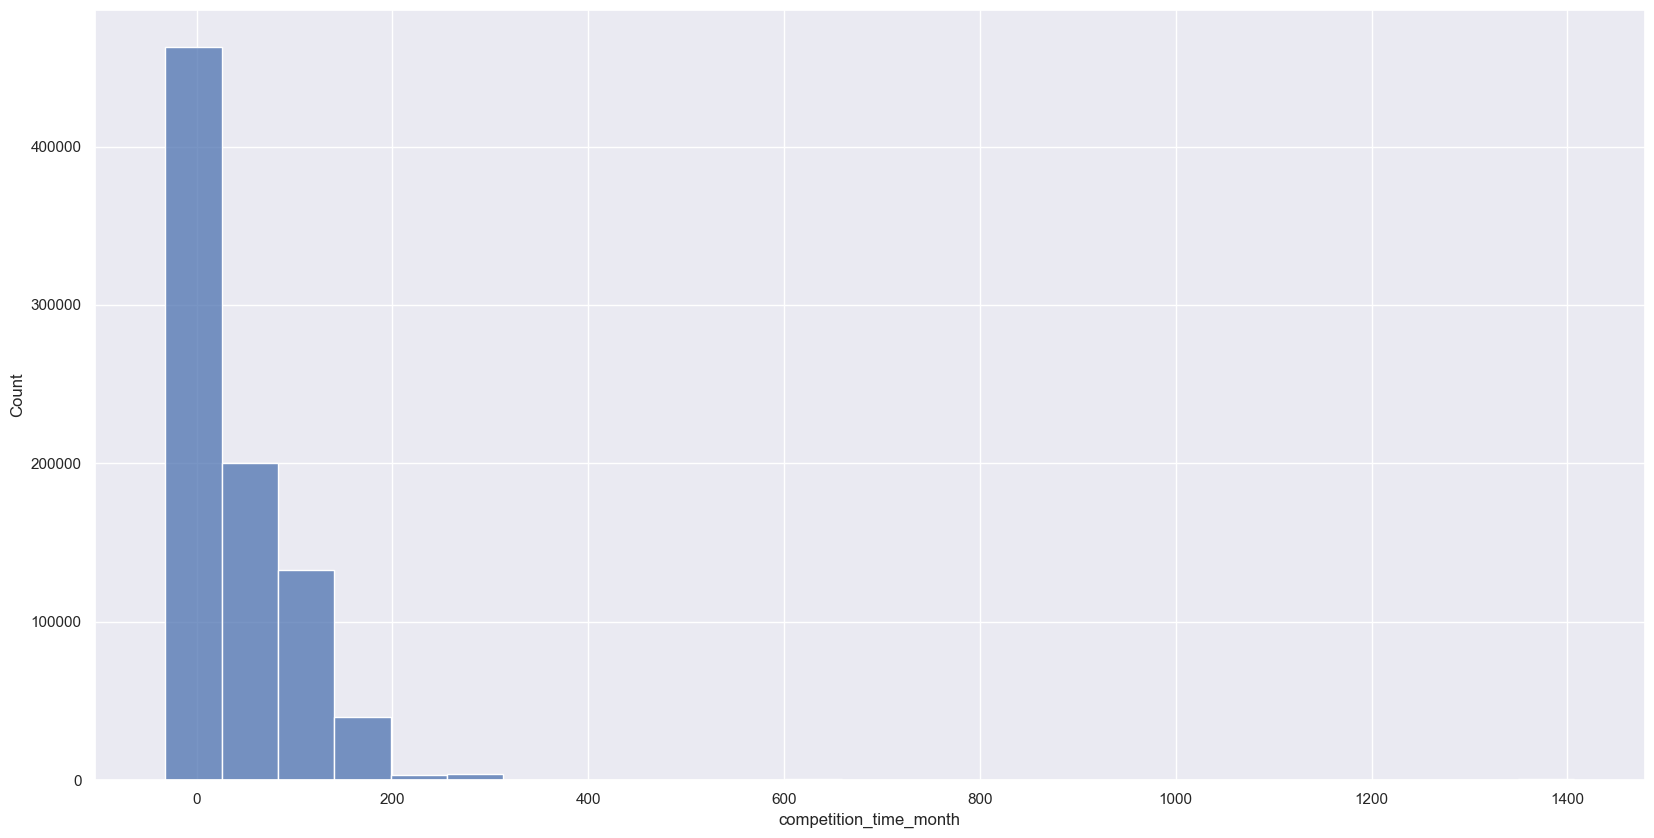

In [62]:
## Comportamento da variável tempo de loja com competidor 

sns.histplot (df4['competition_time_month'], bins = 25)

In [63]:
df4['competition_time_month'].sort_values().unique()

array([ -32,  -31,  -30,  -29,  -28,  -27,  -26,  -25,  -24,  -23,  -22,
        -21,  -20,  -19,  -18,  -17,  -16,  -15,  -14,  -13,  -12,  -11,
        -10,   -9,   -8,   -7,   -6,   -5,   -4,   -3,   -2,   -1,    0,
          1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
         12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
         23,   24,   25,   26,   27,   28,   29,   30,   31,   32,   33,
         34,   35,   36,   37,   38,   39,   40,   41,   42,   43,   44,
         45,   46,   47,   48,   49,   50,   51,   52,   53,   54,   55,
         56,   57,   58,   59,   60,   61,   62,   63,   64,   65,   66,
         67,   68,   69,   70,   71,   72,   73,   74,   75,   76,   77,
         78,   79,   80,   81,   82,   83,   84,   85,   86,   87,   88,
         89,   90,   91,   92,   93,   94,   95,   96,   97,   98,   99,
        100,  101,  102,  103,  104,  105,  106,  107,  108,  109,  110,
        111,  112,  113,  114,  115,  116,  117,  1

#### 4.2.3.2. Desenvolvimento 

In [64]:
### Média de vendas por tempo de competidor próximo da loja existente

aux6 = df4[['sales','competition_time_month']].groupby('competition_time_month').mean().reset_index()
df4[['sales','competition_time_month']].groupby('competition_time_month').mean()

,sales
competition_time_month,
-32,6606.67
-31,6759.61
-30,6912.34
-29,7136.69
-28,7011.01
...,...
1403,6655.39
1404,6752.22
1405,6180.52


<AxesSubplot:xlabel='competition_time_month', ylabel='sales'>

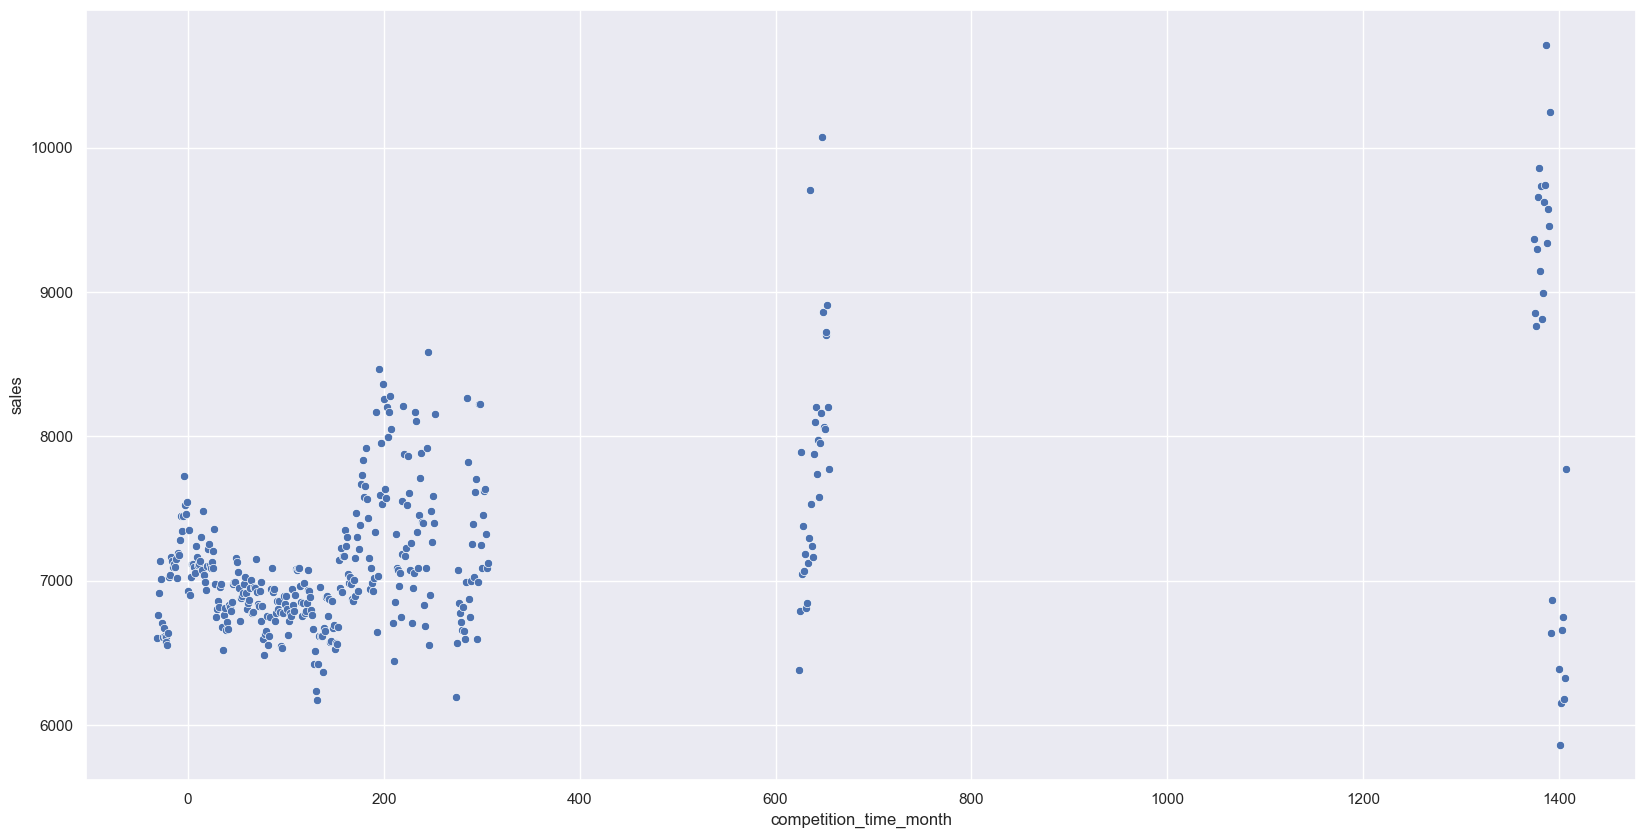

In [65]:
## scatter plot 

sns.scatterplot(x = 'competition_time_month', y = 'sales', data = aux6 )

<AxesSubplot:>

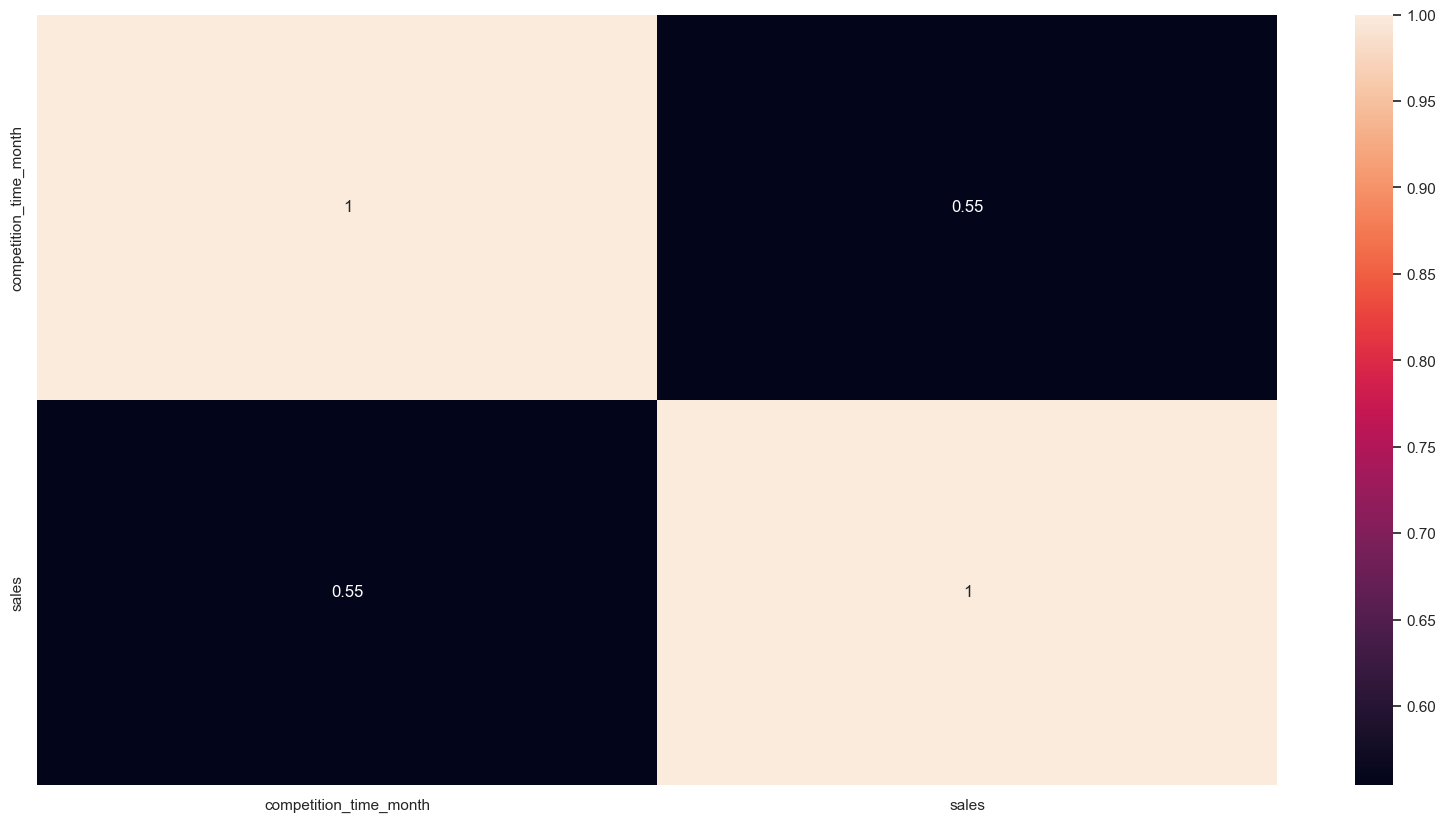

In [66]:
## correlação

sns.heatmap( aux6.corr(method = 'pearson') , annot = True)

In [68]:
bins = list( np.arange(-33, 1408, 30) )

aux6['competition_time_month_grouped'] = pd.cut( aux6['competition_time_month'], bins = bins)

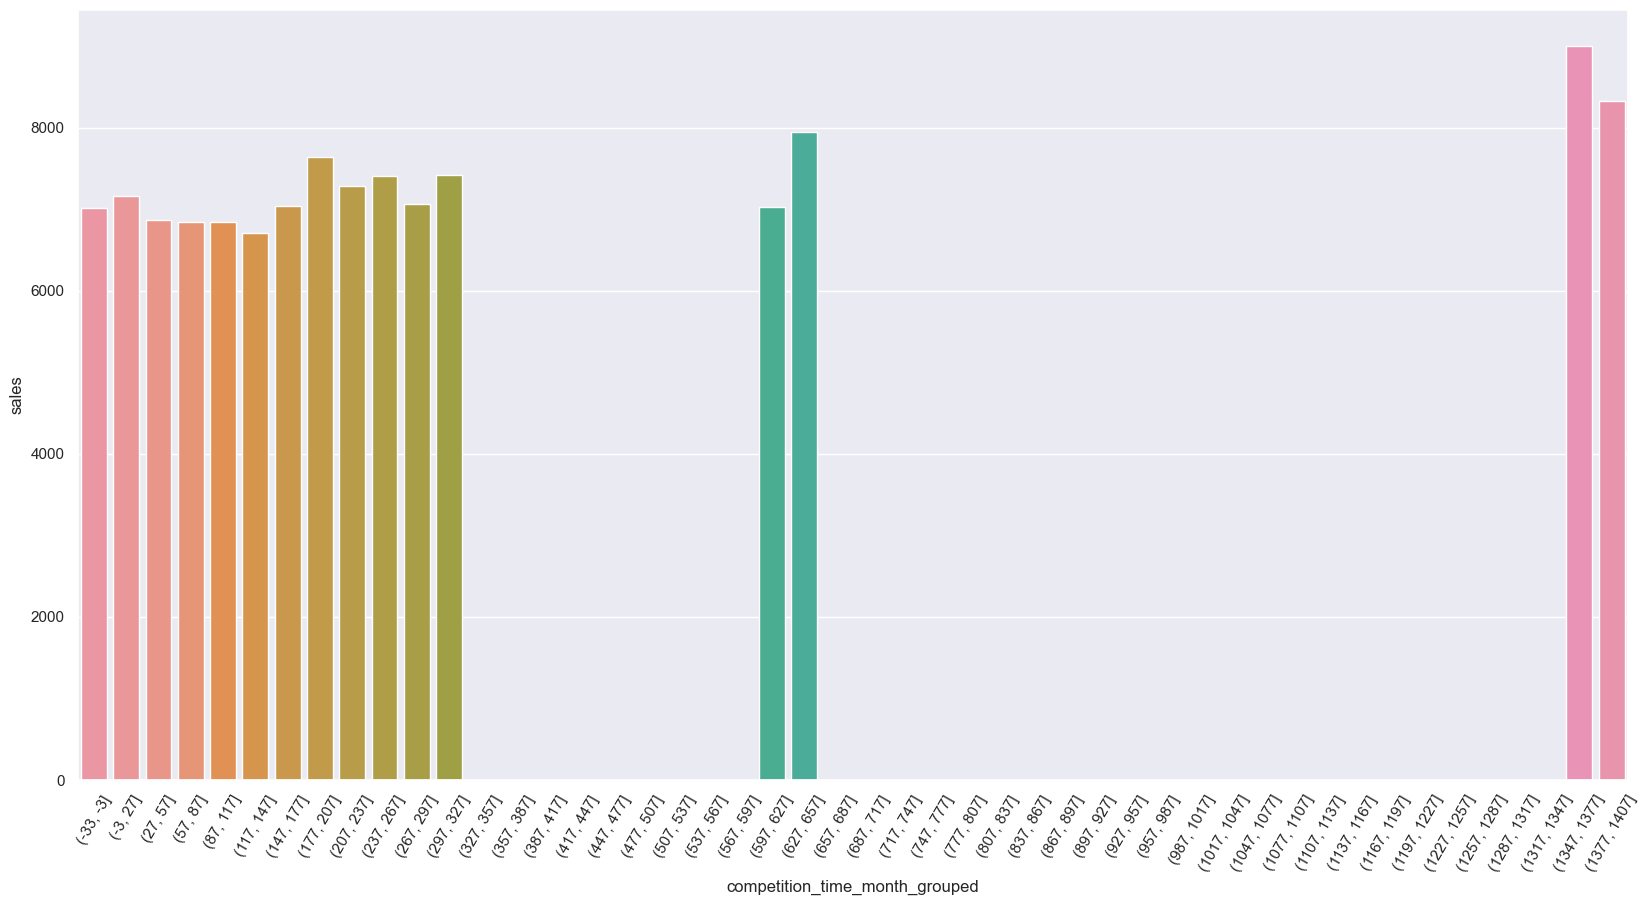

In [72]:
aux7 = aux6[['sales','competition_time_month_grouped']].groupby("competition_time_month_grouped").mean().reset_index()


sns.barplot(x = 'competition_time_month_grouped' , y = 'sales' , data= aux7);
plt.xticks(rotation = 60);

#### 4.2.3.3. Dashboard

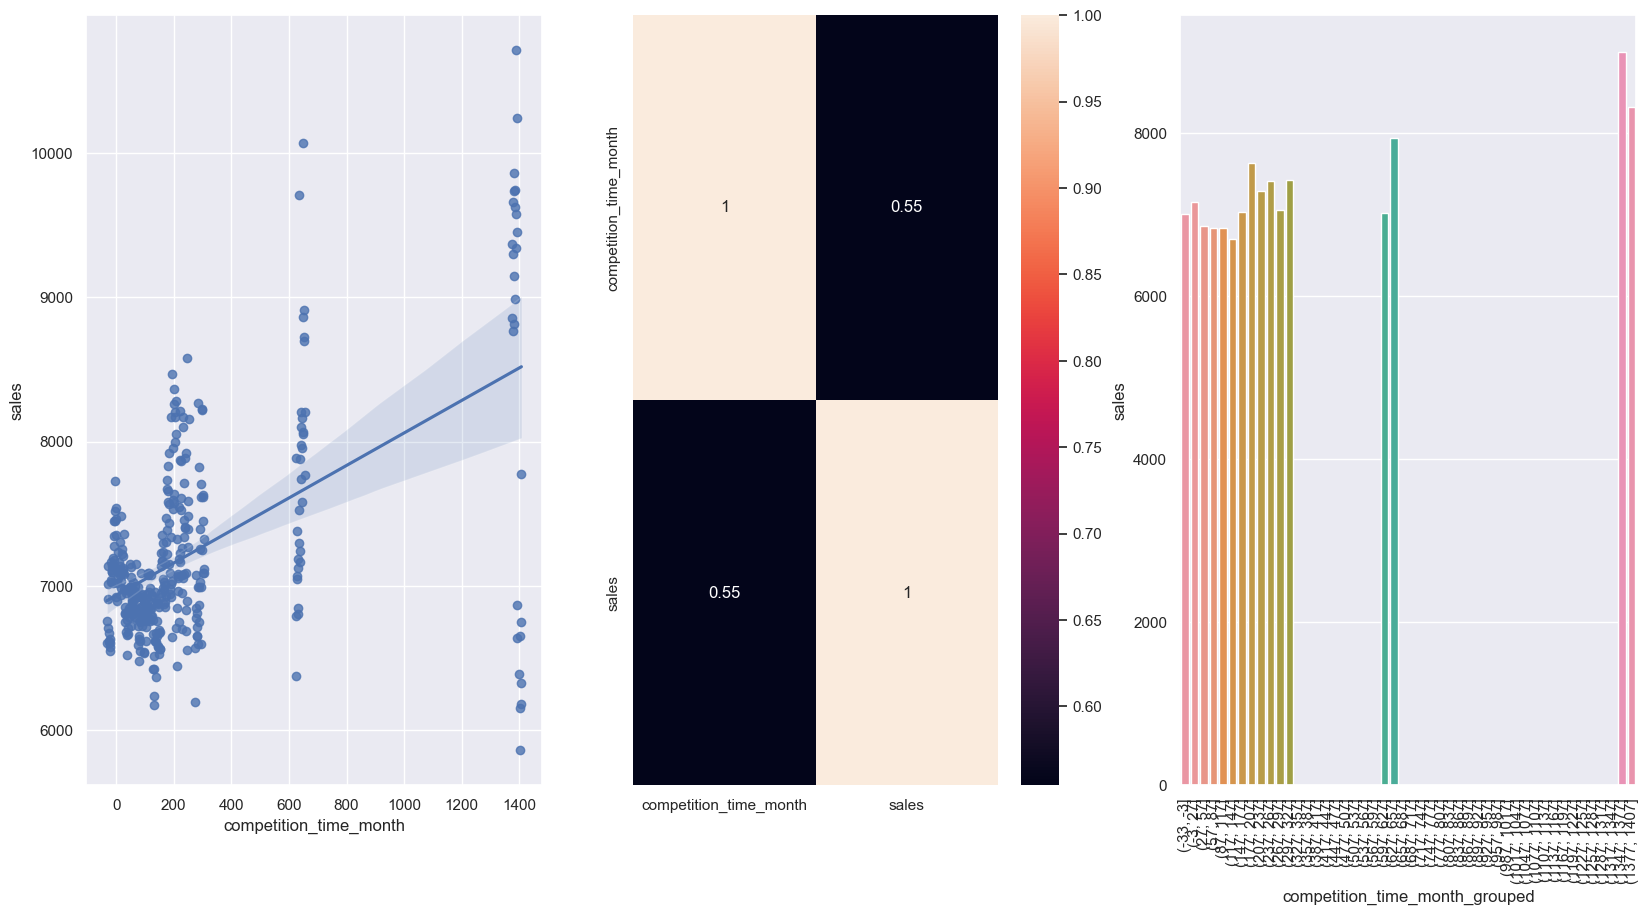

In [75]:
# 1 

aux6 = df4[['sales','competition_time_month']].groupby('competition_time_month').mean().reset_index()

plt.subplot(1,3,1)
# É um gráfico de tendência do scatter plot
sns.regplot(x = 'competition_time_month', y = 'sales', data = aux6 )

# 2 

plt.subplot(1,3,2)
sns.heatmap( aux6.corr(method = 'pearson') , annot = True)

# 3

bins = list( np.arange(-33, 1408, 30) )

aux6['competition_time_month_grouped'] = pd.cut( aux6['competition_time_month'], bins = bins)

aux7 = aux6[['sales','competition_time_month_grouped']].groupby("competition_time_month_grouped").mean().reset_index()

plt.subplot(1,3,3)

sns.barplot(x = 'competition_time_month_grouped' , y = 'sales' , data= aux7);
plt.xticks(rotation = 90);

## 4.3. Análise Multivariada